In [1]:
sspa_path = "/archive/projects/SSPA_BRAY/sspa"
data_path = sspa_path + "/biorepository"
bcell_gex=data_path + "/Bcell_GEX_20251201.h5ad "


In [2]:
pathways = sspa_path + "/c2.cp.v2024.1.Hs.symbols.gmt"

In [3]:
import gseapy as gp

# Load pathways from GMT file
pathways_dict = gp.read_gmt(pathways)

print(f"Loaded {len(pathways_dict)} pathways from GMT file")
print(f"First 5 pathway names: {list(pathways_dict.keys())[:5]}")

Loaded 3917 pathways from GMT file
First 5 pathway names: ['SA_B_CELL_RECEPTOR_COMPLEXES', 'SA_CASPASE_CASCADE', 'SA_FAS_SIGNALING', 'SA_G1_AND_S_PHASES', 'SA_G2_AND_M_PHASES']


In [4]:
pathways_dict

{'SA_B_CELL_RECEPTOR_COMPLEXES': ['ATF2',
  'BCR',
  'BLNK',
  'ELK1',
  'FOS',
  'GRB2',
  'HRAS',
  'JUN',
  'LYN',
  'MAP2K1',
  'MAP3K1',
  'MAPK1',
  'MAPK3',
  'MAPK8IP3',
  'PAPPA',
  'RAC1',
  'RPS6KA1',
  'RPS6KA3',
  'SHC1',
  'SOS1',
  'SYK',
  'VAV1',
  'VAV2',
  'VAV3'],
 'SA_CASPASE_CASCADE': ['APAF1',
  'BIRC2',
  'BIRC3',
  'CASP10',
  'CASP3',
  'CASP7',
  'CASP8',
  'CASP9',
  'DFFA',
  'DFFB',
  'FAS',
  'FASLG',
  'GZMB',
  'PARP1',
  'PRF1',
  'SCAP',
  'SREBF1',
  'SREBF2',
  'XIAP'],
 'SA_FAS_SIGNALING': ['BCL2',
  'CASP3',
  'CASP8',
  'CFL1',
  'CFLAR',
  'FAS',
  'FASLG',
  'PDE6D',
  'S100A10'],
 'SA_G1_AND_S_PHASES': ['ARF1',
  'ARF3',
  'CCND1',
  'CDK2',
  'CDK4',
  'CDKN1A',
  'CDKN1B',
  'CDKN2A',
  'CFL1',
  'E2F1',
  'E2F2',
  'MDM2',
  'NXT1',
  'PRB1',
  'TP53'],
 'SA_G2_AND_M_PHASES': ['CDC25A',
  'CDC25B',
  'CDK1',
  'CDK7',
  'CDKN1A',
  'CHEK1',
  'NEK1',
  'WEE1'],
 'SA_MMP_CYTOKINE_CONNECTION': ['ACE',
  'CD44',
  'CSF1',
  'FCGR3A',
  'IL1B',

In [5]:
import scanpy as sc

adata = sc.read_h5ad(bcell_gex.strip())

In [6]:
adata

AnnData object with n_obs × n_vars = 5223 × 36601
    obs: 'group', 'condition', 't2dm', 'cvda', 'pt_id', 'comb_id', 'Sex', 'celltype_subclust'
    var: 'gene_ids', 'feature_types', 'genome', 'mito', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_type_colors', 'cell_type_rank_genes_groups', 'dendrogram_cell_type', 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'leiden_rank_genes_groups', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'raw'
    obsp: 'connectivities', 'distances'

In [7]:
# Get unique patients per t2dm status
pt_t2dm_summary = adata.obs.groupby('pt_id')['t2dm'].first()

t2dm_counts = pt_t2dm_summary.value_counts()

print("Number of unique patients by t2dm status:")
print(f"t2dm = 0 (no diabetes): {t2dm_counts.get(0, 0)} patients")
print(f"t2dm = 1 (diabetes): {t2dm_counts.get(1, 0)} patients")
print(f"\nTotal unique patients: {adata.obs['pt_id'].nunique()}")

# Also show the breakdown with cell counts
print("\n" + "="*50)
print("Cell counts by t2dm status:")
cell_counts = adata.obs['t2dm'].value_counts()
print(f"t2dm = 0: {cell_counts.get(0, 0)} cells")
print(f"t2dm = 1: {cell_counts.get(1, 0)} cells")

Number of unique patients by t2dm status:
t2dm = 0 (no diabetes): 9 patients
t2dm = 1 (diabetes): 19 patients

Total unique patients: 28

Cell counts by t2dm status:
t2dm = 0: 2049 cells
t2dm = 1: 3174 cells


/tmp/ipykernel_26226/545403117.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pt_t2dm_summary = adata.obs.groupby('pt_id')['t2dm'].first()


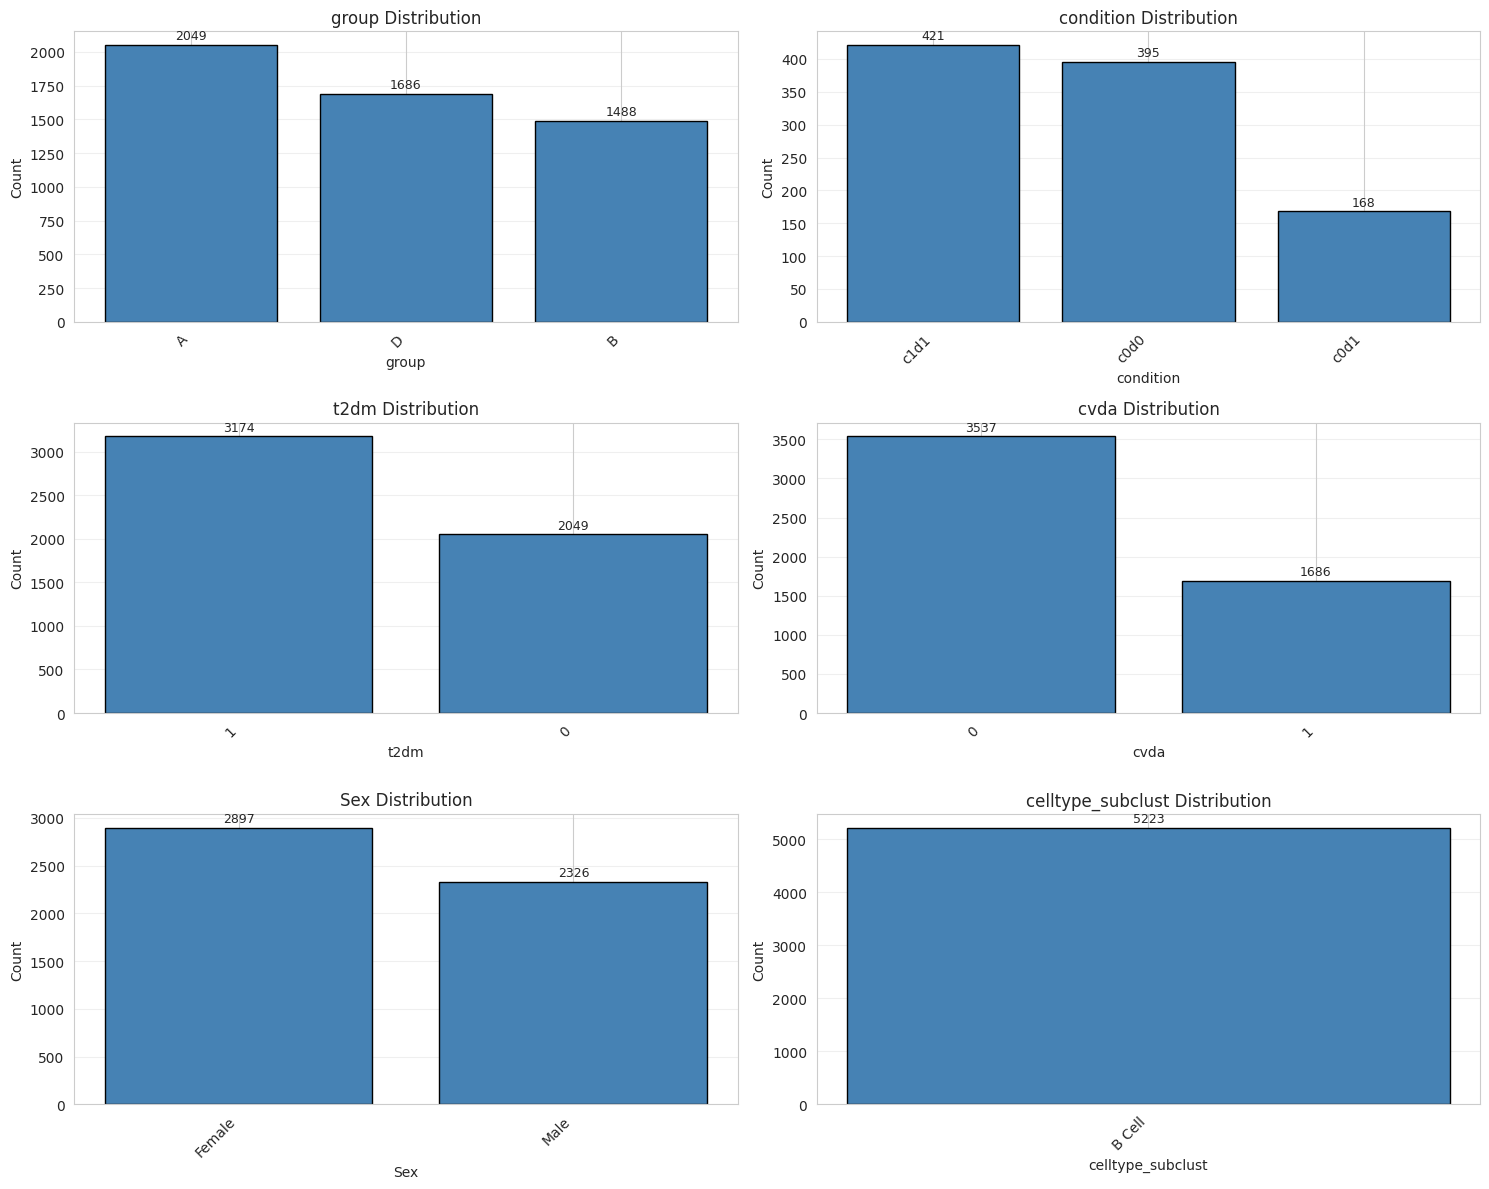


=== Summary Statistics ===

group:
group
A    2049
D    1686
B    1488
Name: count, dtype: int64
Total: 5223
Unique values: 3
--------------------------------------------------
condition:
condition
c1d1    421
c0d0    395
c0d1    168
Name: count, dtype: int64
Total: 5223
Unique values: 3
--------------------------------------------------
t2dm:
t2dm
1    3174
0    2049
Name: count, dtype: int64
Total: 5223
Unique values: 2
--------------------------------------------------
cvda:
cvda
0    3537
1    1686
Name: count, dtype: int64
Total: 5223
Unique values: 2
--------------------------------------------------
Sex:
Sex
Female    2897
Male      2326
Name: count, dtype: int64
Total: 5223
Unique values: 2
--------------------------------------------------
celltype_subclust:
celltype_subclust
B Cell    5223
Name: count, dtype: int64
Total: 5223
Unique values: 1
--------------------------------------------------


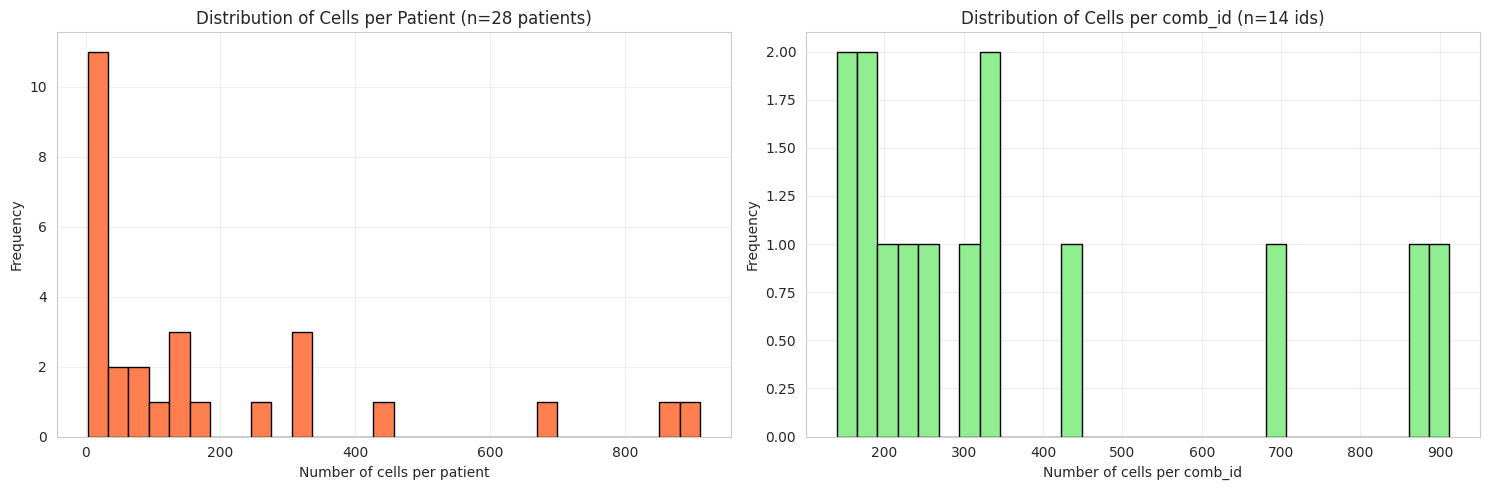

In [8]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set style
sns.set_style("whitegrid")

# Get the categorical columns to plot
categorical_cols = ['group', 'condition', 't2dm', 'cvda', 'Sex', 'celltype_subclust']

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

# Plot value counts for each categorical column
for idx, col in enumerate(categorical_cols):
    if col in adata.obs.columns:
        value_counts = adata.obs[col].value_counts()
        axes[idx].bar(range(len(value_counts)), value_counts.values, color='steelblue', edgecolor='black')
        axes[idx].set_xticks(range(len(value_counts)))
        axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Count')
        axes[idx].set_title(f'{col} Distribution')
        axes[idx].grid(True, alpha=0.3, axis='y')
        
        # Add counts on top of bars
        for i, v in enumerate(value_counts.values):
            axes[idx].text(i, v + max(value_counts.values)*0.01, str(v), 
                          ha='center', va='bottom', fontsize=9)
    else:
        axes[idx].text(0.5, 0.5, f'{col} not found', 
                      ha='center', va='center', transform=axes[idx].transAxes)
        axes[idx].set_title(f'{col} (not available)')

plt.tight_layout()
plt.savefig('adata_obs_categorical_stats.png', dpi=150, bbox_inches='tight')
plt.show()

# Print summary statistics
print("\n=== Summary Statistics ===\n")
for col in categorical_cols:
    if col in adata.obs.columns:
        print(f"{col}:")
        print(adata.obs[col].value_counts())
        print(f"Total: {len(adata.obs[col])}")
        print(f"Unique values: {adata.obs[col].nunique()}")
        print("-" * 50)

# Additional plots for pt_id and comb_id (if they exist)
fig2, axes2 = plt.subplots(1, 2, figsize=(15, 5))

if 'pt_id' in adata.obs.columns:
    axes2[0].hist(adata.obs['pt_id'].value_counts().values, bins=30, color='coral', edgecolor='black')
    axes2[0].set_xlabel('Number of cells per patient')
    axes2[0].set_ylabel('Frequency')
    axes2[0].set_title(f'Distribution of Cells per Patient (n={adata.obs["pt_id"].nunique()} patients)')
    axes2[0].grid(True, alpha=0.3)

if 'comb_id' in adata.obs.columns:
    axes2[1].hist(adata.obs['comb_id'].value_counts().values, bins=30, color='lightgreen', edgecolor='black')
    axes2[1].set_xlabel('Number of cells per comb_id')
    axes2[1].set_ylabel('Frequency')
    axes2[1].set_title(f'Distribution of Cells per comb_id (n={adata.obs["comb_id"].nunique()} ids)')
    axes2[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('adata_obs_patient_stats.png', dpi=150, bbox_inches='tight')
plt.show()

In [9]:
adata.obs['condition'].value_counts()

condition
c1d1    421
c0d0    395
c0d1    168
Name: count, dtype: int64

In [10]:
adata.obs

,group,condition,t2dm,cvda,pt_id,comb_id,Sex,celltype_subclust
AAAGGTAAGTAGCAAT-1,A,c0d0,0,0,A1,A0,Female,B Cell
AACAAAGCATCGTGGC-1,A,c0d0,0,0,A1,A0,Female,B Cell
AACCAACGTAGTCTGT-1,A,c0d0,0,0,A1,A0,Female,B Cell
AAGCGTTAGGTGAGCT-1,A,c0d0,0,0,A1,A0,Female,B Cell
AAGTGAAAGATAACGT-1,A,c0d0,0,0,A1,A0,Female,B Cell
...,...,...,...,...,...,...,...,...
TTTGACTCACAAAGCG-4,D,NaN,1,1,D5,D5,Male,B Cell
TTTGGAGAGCACTAAA-4,D,NaN,1,1,D2,D2,Female,B Cell
TTTGGTTTCATGAGTC-4,D,NaN,1,1,D2,D2,Female,B Cell
TTTGGTTTCCACTGGG-4,D,NaN,1,1,D5,D5,Male,B Cell


In [11]:
adata.obs['pt_id'].nunique()

28

In [12]:
# adata.var['highly_variable'].value_counts()

In [13]:
raw_df = adata.to_df(layer="raw")

In [14]:
raw_df

,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.5,AL627309.4,AP006222.2,AL732372.1,...,AC133551.1,AC136612.1,AC136616.1,AC136616.3,AC136616.2,AC141272.1,AC023491.2,AC007325.1,AC007325.4,AC007325.2
AAAGGTAAGTAGCAAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AACAAAGCATCGTGGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AACCAACGTAGTCTGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAGCGTTAGGTGAGCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAGTGAAAGATAACGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGACTCACAAAGCG-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGGAGAGCACTAAA-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGGTTTCATGAGTC-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGGTTTCCACTGGG-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# highly_variable_genes = adata.var[adata.var['highly_variable']].index
# raw_df_filtered = raw_df[highly_variable_genes]

In [16]:
# raw_df_filtered

In [15]:
control_cases = raw_df[adata.obs['t2dm'] == 0]

In [16]:
control_cases

,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.5,AL627309.4,AP006222.2,AL732372.1,...,AC133551.1,AC136612.1,AC136616.1,AC136616.3,AC136616.2,AC141272.1,AC023491.2,AC007325.1,AC007325.4,AC007325.2
AAAGGTAAGTAGCAAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AACAAAGCATCGTGGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AACCAACGTAGTCTGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAGCGTTAGGTGAGCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAGTGAAAGATAACGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGAGAGGTACATA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGGTTCAAGTGTCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGGTTTCTAAGCGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTTGCACCAGTTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
import pickle
import numpy as np
import pandas as pd
import scipy.sparse as sp
import os
from typing import Tuple, Dict, List, Optional
import sys

In [18]:
sys.path.append('/labs/Aguiar/SSPA_BRAY/BRay/VariationalInference')

from gene_convertor import GeneIDConverter

# Initialize gene converter globally
gene_converter = GeneIDConverter()

Loaded gene ID cache with 82390 symbol mappings


In [21]:
def load_gene_annotation(annotation_path: str) -> Tuple[pd.DataFrame, Dict, List]:
    """
    Load gene annotation file and convert gene names to Ensembl IDs.
    
    Args:
        annotation_path: Path to gene annotation CSV file
        
    Returns:
        Tuple of (gene_annotation, ensembl_map, ensembl_ids)
    """
    print(f"Loading gene annotation from {annotation_path}...")
    gene_annotation = pd.read_csv(annotation_path)
    gene_annotation = gene_annotation.set_index('Genename')
    
    gene_names = gene_annotation.index.tolist()
    gene_annotation_ensembl_map, gene_annotation_ensembl_ids = gene_converter.symbols_to_ensembl(gene_names)
    
    print(f"Loaded annotation for {len(gene_annotation)} genes")
    
    return gene_annotation, gene_annotation_ensembl_map, gene_annotation_ensembl_ids

In [22]:
gene_annotation_path = "/labs/Aguiar/SSPA_BRAY/BRay/BRAY_FileTransfer/ENS_mouse_geneannotation.csv"
gene_annotation = pd.read_csv(gene_annotation_path)
gene_annotation = gene_annotation.set_index('Genename')

In [23]:
gene_names = gene_annotation.index.tolist()

gene_annotation_ensembl_map, gene_annotation_ensembl_ids = gene_converter.symbols_to_ensembl(gene_names)

Detected gene format: symbol
All 46078 genes found in cache or already in Ensembl format


In [24]:
# Convert gene names to Ensembl IDs
sample_gene_names = control_cases.columns.tolist()
sample_ensembl_map, _ = gene_converter.symbols_to_ensembl(sample_gene_names)
ensembl_names = [sample_ensembl_map.get(gene, gene) for gene in sample_gene_names]
control_cases.columns = ensembl_names

# Remove duplicate genes
print(f"Shape before removing duplicates: {control_cases.shape}")
mask = ~control_cases.columns.duplicated(keep='first')
control_cases = control_cases.loc[:, mask]
print(f"Shape after removing duplicates: {control_cases.shape}")

# Filter for protein-coding genes (requires gene_annotation to be loaded first)
print("Filtering for protein-coding genes...")
protein_coding_genes = gene_annotation[
    gene_annotation['Genetype'] == 'protein_coding'
]['GeneID'].tolist()

common_genes = control_cases.columns.intersection(protein_coding_genes)
control_cases = control_cases[common_genes]
print(f"Final shape after protein coding filter: {control_cases.shape}")


Detected gene format: symbol
All 36601 genes found in cache or already in Ensembl format
Shape before removing duplicates: (2049, 36601)
Shape after removing duplicates: (2049, 16421)
Filtering for protein-coding genes...
Final shape after protein coding filter: (2049, 16054)


In [25]:
control_cases

,ENSMUSG00000096351,ENSMUSG00000095567,ENSMUSG00000078485,ENSMUSG00000078486,ENSMUSG00000035692,ENSMUSG00000041936,ENSMUSG00000029074,ENSMUSG00000041954,ENSMUSG00000029075,ENSMUSG00000029076,...,ENSMUSG00000064351,ENSMUSG00000064354,ENSMUSG00000064356,ENSMUSG00000064357,ENSMUSG00000064358,ENSMUSG00000064360,ENSMUSG00000065947,ENSMUSG00000064363,ENSMUSG00000064367,ENSMUSG00000064368
AAAGGTAAGTAGCAAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.0,15.0,3.0,44.0,20.0,11.0,1.0,14.0,3.0,0.0
AACAAAGCATCGTGGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,22.0,19.0,7.0,38.0,29.0,21.0,1.0,15.0,6.0,1.0
AACCAACGTAGTCTGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.0,28.0,8.0,38.0,23.0,28.0,2.0,11.0,6.0,1.0
AAGCGTTAGGTGAGCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30.0,37.0,3.0,43.0,37.0,25.0,3.0,15.0,6.0,3.0
AAGTGAAAGATAACGT-1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,45.0,2.0,70.0,36.0,39.0,2.0,34.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGAGAGGTACATA-1,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,1.0,...,218.0,234.0,27.0,261.0,209.0,229.0,13.0,158.0,34.0,6.0
TTTGGTTCAAGTGTCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,108.0,119.0,28.0,159.0,113.0,70.0,5.0,81.0,22.0,3.0
TTTGGTTTCTAAGCGT-1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,75.0,93.0,24.0,102.0,84.0,101.0,5.0,54.0,15.0,3.0
TTTGTTGCACCAGTTA-1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,310.0,199.0,50.0,196.0,320.0,195.0,10.0,86.0,48.0,10.0


In [26]:
# random_sample = random_sample.sample(n=200, random_state=42)

In [27]:
# random_sample

In [28]:
# Check the highest expression values in control_cases
print("Highest expression values in control_cases:")
print(f"Maximum value: {control_cases.max().max()}")
print(f"Mean of maximum values per gene: {control_cases.max().mean()}")
print(f"Mean of maximum values per cell: {control_cases.max(axis=1).mean()}")

# Show top 10 highest expression values and their locations
max_values = control_cases.max()
top_genes = max_values.nlargest(10)
print(f"\nTop 10 genes by maximum expression:")
for gene, value in top_genes.items():
    print(f"{gene}: {value}")

# Show some statistics about the expression distribution
print(f"\nExpression distribution statistics:")
print(f"Overall mean: {control_cases.mean().mean():.4f}")
print(f"Overall std: {control_cases.std().std():.4f}")
print(f"Percentage of zeros: {(control_cases == 0).sum().sum() / (control_cases.shape[0] * control_cases.shape[1]) * 100:.2f}%")


Highest expression values in control_cases:
Maximum value: 808.0
Mean of maximum values per gene: 7.241123676300049
Mean of maximum values per cell: 107.83016204833984

Top 10 genes by maximum expression:
ENSMUSG00000067149: 808.0
ENSMUSG00000064358: 771.0
ENSMUSG00000064354: 638.0
ENSMUSG00000064351: 618.0
ENSMUSG00000064357: 556.0
ENSMUSG00000079523: 407.0
ENSMUSG00000064360: 404.0
ENSMUSG00000040270: 331.0
ENSMUSG00000064363: 288.0
ENSMUSG00000093674: 271.0

Expression distribution statistics:
Overall mean: 0.4870
Overall std: 1.7250
Percentage of zeros: 84.61%


In [29]:
# Check for genes that are zero across all samples
zero_genes = (control_cases == 0).all(axis=0)
num_zero_genes = zero_genes.sum()

print(f"Number of genes with zero expression across all samples: {num_zero_genes}")
print(f"Percentage of genes with all zeros: {(num_zero_genes / len(control_cases.columns)) * 100:.2f}%")

if num_zero_genes > 0:
    print(f"\nGenes with all zero expression:")
    zero_gene_names = control_cases.columns[zero_genes].tolist()
    print(f"First 20 genes: {zero_gene_names[:20]}")

Number of genes with zero expression across all samples: 1638
Percentage of genes with all zeros: 10.20%

Genes with all zero expression:
First 20 genes: ['ENSMUSG00000078486', 'ENSMUSG00000042116', 'ENSMUSG00000048001', 'ENSMUSG00000058183', 'ENSMUSG00000051276', 'ENSMUSG00000029032', 'ENSMUSG00000028946', 'ENSMUSG00000029019', 'ENSMUSG00000078507', 'ENSMUSG00000043085', 'ENSMUSG00000006221', 'ENSMUSG00000033770', 'ENSMUSG00000006216', 'ENSMUSG00000060572', 'ENSMUSG00000040935', 'ENSMUSG00000078234', 'ENSMUSG00000070661', 'ENSMUSG00000028751', 'ENSMUSG00000028749', 'ENSMUSG00000028750']


In [30]:
# Remove genes with zero expression across all samples
control_cases = control_cases.loc[:, (control_cases != 0).any(axis=0)]
print(f"Shape after removing all-zero genes: {control_cases.shape}")

# Keep only genes expressed in at least 2% of cells
min_cells = int(0.02 * control_cases.shape[0])  # 2% of cells
genes_to_keep = (control_cases > 0).sum(axis=0) >= min_cells
control_cases = control_cases.loc[:, genes_to_keep]
print(f"Shape after keeping genes expressed in at least 2% of cells (>={min_cells} cells): {control_cases.shape}")

Shape after removing all-zero genes: (2049, 14416)
Shape after keeping genes expressed in at least 2% of cells (>=40 cells): (2049, 9863)


In [31]:
control_cases

,ENSMUSG00000095567,ENSMUSG00000035692,ENSMUSG00000041954,ENSMUSG00000029076,ENSMUSG00000050796,ENSMUSG00000023286,ENSMUSG00000029033,ENSMUSG00000051557,ENSMUSG00000029034,ENSMUSG00000029071,...,ENSMUSG00000064351,ENSMUSG00000064354,ENSMUSG00000064356,ENSMUSG00000064357,ENSMUSG00000064358,ENSMUSG00000064360,ENSMUSG00000065947,ENSMUSG00000064363,ENSMUSG00000064367,ENSMUSG00000064368
AAAGGTAAGTAGCAAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.0,15.0,3.0,44.0,20.0,11.0,1.0,14.0,3.0,0.0
AACAAAGCATCGTGGC-1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.0,19.0,7.0,38.0,29.0,21.0,1.0,15.0,6.0,1.0
AACCAACGTAGTCTGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.0,28.0,8.0,38.0,23.0,28.0,2.0,11.0,6.0,1.0
AAGCGTTAGGTGAGCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30.0,37.0,3.0,43.0,37.0,25.0,3.0,15.0,6.0,3.0
AAGTGAAAGATAACGT-1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,45.0,2.0,70.0,36.0,39.0,2.0,34.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGAGAGGTACATA-1,0.0,6.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,218.0,234.0,27.0,261.0,209.0,229.0,13.0,158.0,34.0,6.0
TTTGGTTCAAGTGTCT-1,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,108.0,119.0,28.0,159.0,113.0,70.0,5.0,81.0,22.0,3.0
TTTGGTTTCTAAGCGT-1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,75.0,93.0,24.0,102.0,84.0,101.0,5.0,54.0,15.0,3.0
TTTGTTGCACCAGTTA-1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,310.0,199.0,50.0,196.0,320.0,195.0,10.0,86.0,48.0,10.0


In [32]:
# Extract t2dm and pt_id columns from adata.obs for the control_cases indices
features_matrix = adata.obs.loc[control_cases.index, ['t2dm', 'pt_id']].copy()

features_matrix


,t2dm,pt_id
AAAGGTAAGTAGCAAT-1,0,A1
AACAAAGCATCGTGGC-1,0,A1
AACCAACGTAGTCTGT-1,0,A1
AAGCGTTAGGTGAGCT-1,0,A1
AAGTGAAAGATAACGT-1,0,A1
...,...,...
TTTGGAGAGGTACATA-1,0,A8
TTTGGTTCAAGTGTCT-1,0,A4
TTTGGTTTCTAAGCGT-1,0,A8
TTTGTTGCACCAGTTA-1,0,A8


In [33]:
features_matrix['pt_id'].nunique()

9

In [34]:
import os
import json
from sklearn.model_selection import train_test_split

# Create output directory
output_dir = '/labs/Aguiar/SSPA_BRAY/BRay/ctrl_sspa_test'
os.makedirs(output_dir, exist_ok=True)

# Split the data: 70% train, 15% validation, 15% test
train_ids, temp_ids = train_test_split(control_cases.index, test_size=0.3, random_state=42)
val_ids, test_ids = train_test_split(temp_ids, test_size=0.5, random_state=42)

print(f"Train size: {len(train_ids)}")
print(f"Validation size: {len(val_ids)}")
print(f"Test size: {len(test_ids)}")

# Save data split cell IDs
data_split = {
    'train': train_ids.tolist(),
    'val': val_ids.tolist(),
    'test': test_ids.tolist()
}

with open(os.path.join(output_dir, 'data_split_cell_ids.json'), 'w') as f:
    json.dump(data_split, f, indent=2)

# Save the expression dataframe (df.pkl)
control_cases.to_pickle(os.path.join(output_dir, 'df.pkl'))

# Save the features dataframe (features.pkl)
features_matrix.to_pickle(os.path.join(output_dir, 'features.pkl'))

# Save train data with full genes (train_data_full_genes.csv)
train_data = control_cases.loc[train_ids]
train_data.to_csv(os.path.join(output_dir, 'train_data_full_genes.csv'))

# Save gene list
gene_list = control_cases.columns.tolist()
with open(os.path.join(output_dir, 'gene_list.txt'), 'w') as f:
    for gene in gene_list:
        f.write(f"{gene}\n")

print(f"\nFiles saved in: {output_dir}")
print(f"- df.pkl: {control_cases.shape}")
print(f"- features.pkl: {features_matrix.shape}")
print(f"- train_data_full_genes.csv: {train_data.shape}")
print(f"- gene_list.txt: {len(gene_list)} genes")
print(f"- data_split_cell_ids.json")

Train size: 1434
Validation size: 307
Test size: 308

Files saved in: /labs/Aguiar/SSPA_BRAY/BRay/ctrl_sspa_test
- df.pkl: (2049, 9863)
- features.pkl: (2049, 2)
- train_data_full_genes.csv: (1434, 9863)
- gene_list.txt: 9863 genes
- data_split_cell_ids.json


In [35]:
# Filter pathways to keep only those starting with REACTOME_
reactome_pathways = {k: v for k, v in pathways_dict.items() if k.startswith('REACTOME_')}

print(f"Original number of pathways: {len(pathways_dict)}")
print(f"Number of REACTOME pathways: {len(reactome_pathways)}")
print(f"First 10 REACTOME pathway names: {list(reactome_pathways.keys())[:10]}")

Original number of pathways: 3917
Number of REACTOME pathways: 1736
First 10 REACTOME pathway names: ['REACTOME_2_LTR_CIRCLE_FORMATION', 'REACTOME_ABACAVIR_ADME', 'REACTOME_ABACAVIR_TRANSMEMBRANE_TRANSPORT', 'REACTOME_ABC_FAMILY_PROTEINS_MEDIATED_TRANSPORT', 'REACTOME_ABC_TRANSPORTERS_IN_LIPID_HOMEOSTASIS', 'REACTOME_ABC_TRANSPORTER_DISORDERS', 'REACTOME_ABERRANT_REGULATION_OF_MITOTIC_EXIT_IN_CANCER_DUE_TO_RB1_DEFECTS', 'REACTOME_ABERRANT_REGULATION_OF_MITOTIC_G1_S_TRANSITION_IN_CANCER_DUE_TO_RB1_DEFECTS', 'REACTOME_ABORTIVE_ELONGATION_OF_HIV_1_TRANSCRIPT_IN_THE_ABSENCE_OF_TAT', 'REACTOME_ACETYLCHOLINE_BINDING_AND_DOWNSTREAM_EVENTS']


In [36]:
reactome_pathways

{'REACTOME_2_LTR_CIRCLE_FORMATION': ['BANF1',
  'HMGA1',
  'LIG4',
  'PSIP1',
  'XRCC4',
  'XRCC5',
  'XRCC6'],
 'REACTOME_ABACAVIR_ADME': ['ABCB1',
  'ABCG2',
  'ADAL',
  'ADH1A',
  'NT5C2',
  'PCK1',
  'SLC22A1',
  'SLC22A2',
  'SLC22A3'],
 'REACTOME_ABACAVIR_TRANSMEMBRANE_TRANSPORT': ['ABCB1',
  'ABCG2',
  'SLC22A1',
  'SLC22A2',
  'SLC22A3'],
 'REACTOME_ABC_FAMILY_PROTEINS_MEDIATED_TRANSPORT': ['ABCA10',
  'ABCA12',
  'ABCA2',
  'ABCA3',
  'ABCA4',
  'ABCA5',
  'ABCA6',
  'ABCA7',
  'ABCA8',
  'ABCA9',
  'ABCB1',
  'ABCB10',
  'ABCB4',
  'ABCB5',
  'ABCB6',
  'ABCB7',
  'ABCB8',
  'ABCB9',
  'ABCC1',
  'ABCC10',
  'ABCC11',
  'ABCC2',
  'ABCC3',
  'ABCC4',
  'ABCC5',
  'ABCC6',
  'ABCC9',
  'ABCD1',
  'ABCD2',
  'ABCD3',
  'ABCF1',
  'ABCG1',
  'ABCG4',
  'ABCG5',
  'ABCG8',
  'APOA1',
  'CFTR',
  'DERL1',
  'DERL2',
  'DERL3',
  'EIF2S1',
  'EIF2S2',
  'EIF2S3',
  'ERLEC1',
  'ERLIN1',
  'ERLIN2',
  'KCNJ11',
  'OS9',
  'PEX19',
  'PEX3',
  'PSMA1',
  'PSMA2',
  'PSMA3',
  'PSMA4'

In [37]:
import gzip

# Load gene programs
gene_programs = pd.read_csv('/labs/Aguiar/SSPA_BRAY/sspa_gene_programs.csv.gz', compression='gzip')

# Load model
with open('/labs/Aguiar/SSPA_BRAY/sspa_model.pkl', 'rb') as f:
    sspa_model = pickle.load(f)

# Load predictions
test_predictions = pd.read_csv('/labs/Aguiar/SSPA_BRAY/sspa_test_predictions.csv.gz', compression='gzip')
val_predictions = pd.read_csv('/labs/Aguiar/SSPA_BRAY/sspa_val_predictions.csv.gz', compression='gzip')

# Load theta matrices
theta_test = pd.read_csv('/labs/Aguiar/SSPA_BRAY/sspa_theta_test.csv.gz', compression='gzip', index_col=0)
theta_train = pd.read_csv('/labs/Aguiar/SSPA_BRAY/sspa_theta_train.csv.gz', compression='gzip', index_col=0)
theta_val = pd.read_csv('/labs/Aguiar/SSPA_BRAY/sspa_theta_val.csv.gz', compression='gzip', index_col=0)

# Load VI summary
with gzip.open('/labs/Aguiar/SSPA_BRAY/sspa_vi_summary.json.gz', 'rt') as f:
    vi_summary = json.load(f)

print("Loaded files:")
print(f"- gene_programs: {gene_programs.shape}")
print(f"- test_predictions: {test_predictions.shape}")
print(f"- val_predictions: {val_predictions.shape}")
print(f"- theta_test: {theta_test.shape}")
print(f"- theta_train: {theta_train.shape}")
print(f"- theta_val: {theta_val.shape}")
print(f"- VI summary keys: {list(vi_summary.keys())}")

FileNotFoundError: [Errno 2] No such file or directory: '/labs/Aguiar/SSPA_BRAY/sspa_gene_programs.csv.gz'

In [ ]:
vi_summary

{'hyperparameters': {'d': 20,
  'alpha_theta': 0.5,
  'alpha_beta': 2.0,
  'alpha_xi': 2.0,
  'alpha_eta': 2.0,
  'lambda_xi': 2.0,
  'lambda_eta': 1.5,
  'sigma_v': 2.0,
  'sigma_gamma': 1.0},
 'data_shapes': {'n_genes': 9860,
  'n_train': 1434,
  'n_val': 307,
  'n_test': 308,
  'n_factors': 20},
 'elbo_history': [[0, -276434947429.9871],
  [10, -25922224.3460464],
  [20, -25834758.292740498],
  [30, -25772783.869304247],
  [40, -24831531.999863684],
  [50, -22752675.242807124],
  [60, -21841318.501352523],
  [70, -21056074.8862696],
  [80, -20291602.276806414],
  [90, -19689696.701639265],
  [99, -19226999.96342612]]}

In [ ]:
theta_train

,GP1,GP2,GP3,GP4,GP5,GP6,GP7,GP8,GP9,GP10,GP11,GP12,GP13,GP14,GP15,GP16,GP17,GP18,GP19,GP20
CTCAAGACACTTGTCC-6,0.000478,0.018983,0.001256,0.000572,0.000362,0.000362,0.026893,0.123462,0.359622,0.043250,0.000339,0.707835,0.001106,0.093127,0.003356,0.000428,0.061872,0.001335,0.001081,0.000359
TCCTCCCGTACGAGTG-1,0.021921,0.017961,0.005463,0.069803,0.057458,0.066063,0.010791,0.130922,0.000437,0.249918,0.048824,0.021966,0.001444,0.012238,0.001003,0.000714,0.015116,0.013222,0.000957,0.159655
GAGAGGTCAATCGAAA-1,0.248405,0.001834,0.125820,0.004248,0.033218,0.011406,0.001462,0.048498,0.031406,0.191356,0.168162,0.000849,0.012403,0.039276,0.000472,0.164160,0.000685,0.002233,0.032645,0.092305
GTTCGCTTCGGAATTC-1,0.005041,0.022166,0.146868,0.002827,0.162932,0.057769,0.000508,0.154135,0.001769,0.287286,0.041889,0.001796,0.044652,0.002183,0.000551,0.006519,0.000410,0.023322,0.000476,0.015804
CAGCAGCTCCCTCGTA-1,0.107925,0.010452,0.317063,0.005834,0.057909,0.021965,0.003228,0.163480,0.042887,0.108211,0.167945,0.040694,0.037965,0.053566,0.002419,0.156424,0.015891,0.004678,0.018071,0.053139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCCAGAACAATGACCT-1,0.023156,0.047332,0.037061,0.693047,0.011339,0.062169,0.229672,0.167971,0.051242,0.044941,0.331748,0.053475,0.008234,0.067142,0.065947,0.003115,0.408277,0.001280,0.418242,0.566648
CTACGGGAGCACCGTC-1,0.150763,0.229849,0.163567,0.429230,0.456315,0.886146,0.281723,0.208975,0.064064,0.182218,0.748123,0.195382,0.162150,0.121453,0.627887,0.261084,0.302735,0.130905,0.395797,1.066469
CTCCCTCGTAGGAAAG-1,0.000461,0.003101,0.000871,0.000377,0.000555,0.000584,0.002339,0.000351,0.650029,0.003790,0.000418,1.791308,0.006369,0.000452,0.141228,0.333930,0.611378,0.140709,0.039537,0.000421
GATGCTAGTAGATTGA-1,0.008212,0.009078,0.043800,0.110606,0.910946,0.760457,0.039918,0.027473,0.003912,0.004411,0.145869,0.127969,0.025094,0.007091,0.121098,0.204452,0.178770,0.190494,0.091265,0.161475


In [ ]:
gene_programs

,program,v_weight,ENSMUSG00000095567,ENSMUSG00000035692,ENSMUSG00000041954,ENSMUSG00000029076,ENSMUSG00000050796,ENSMUSG00000023286,ENSMUSG00000029033,ENSMUSG00000051557,...,ENSMUSG00000064351,ENSMUSG00000064354,ENSMUSG00000064356,ENSMUSG00000064357,ENSMUSG00000064358,ENSMUSG00000064360,ENSMUSG00000065947,ENSMUSG00000064363,ENSMUSG00000064367,ENSMUSG00000064368
0,GP1,-3.0,0.048884,0.156706,0.026107,0.085133,0.030993,0.176951,0.074764,0.027273,...,13.338863,12.873862,2.701272,14.598526,15.797462,9.733889,0.708970,5.945779,2.142596,0.075370
1,GP2,-3.0,0.040720,0.048815,0.110354,0.101600,0.016059,0.070447,0.034204,0.014051,...,11.919551,6.125227,2.904720,6.436785,5.794707,2.945377,0.679791,4.589757,1.572068,0.263372
2,GP3,-3.0,0.061378,0.104799,0.023284,0.066284,0.021886,0.105452,0.063567,0.017569,...,20.546252,33.199054,3.017777,35.473013,39.318850,16.804759,1.949869,14.075661,4.412418,0.327325
3,GP4,-3.0,0.042835,0.035148,0.009411,0.048346,0.029460,0.075250,0.016054,0.012319,...,11.022866,12.467201,4.677937,11.381566,10.892574,13.826952,0.962664,6.640602,3.431761,0.524038
4,GP5,-3.0,0.080098,0.083074,0.019912,0.058889,0.030174,0.067417,0.036509,0.022472,...,114.620427,121.198126,18.172910,133.610563,124.772545,96.594139,6.409660,69.423972,19.346668,0.691477
5,GP6,-3.0,0.110414,0.059955,0.010880,0.081821,0.035334,0.074278,0.015945,0.016131,...,45.840281,66.353224,20.580715,75.022043,53.347032,130.823923,4.160501,46.018234,10.635475,2.078077
6,GP7,-3.0,0.054857,0.059338,0.015566,0.061058,0.026857,0.058194,0.023351,0.018742,...,7.820574,7.514661,5.989609,6.104861,6.155530,8.551810,0.742446,4.542618,3.480551,0.614680
7,GP8,-3.0,0.039073,0.015920,0.009047,0.109227,0.012923,0.173802,0.016647,0.013847,...,10.986493,18.236856,3.874367,14.749041,21.567356,10.920173,1.243018,6.893277,2.939716,0.566427
8,GP9,-3.0,0.025347,0.031740,0.011823,0.051415,0.015399,0.045341,0.035030,0.009492,...,5.869869,5.368484,2.809576,4.154483,9.343787,3.418504,0.560946,2.515315,1.594488,0.258311
9,GP10,-3.0,0.047771,0.133315,0.008558,0.061515,0.012486,0.056754,0.030664,0.011167,...,12.187479,9.768578,0.572488,14.831523,14.013163,2.810832,1.988270,7.641840,1.608440,0.378892


In [ ]:
test_predictions

,cell_id,true_label,pred_prob,pred_label
0,AACCAACGTAGTCTGT-1,0,0.060837,0
1,CTAACTTGTGAACCGA-1,0,0.183174,0
2,CTGCAGGAGTCATGGG-1,0,0.044700,0
3,GATCACAAGCATCAGG-1,0,0.003993,0
4,GTGTGATAGTACAGCG-1,0,0.048098,0
...,...,...,...,...
303,TTTGACTAGCAAATGT-1,0,0.003581,0
304,TTTGATCAGAGTCCGA-1,0,0.000014,0
305,TTTGATCCAAATGCTC-1,0,0.004246,0
306,TTTGATCCAGGGAATC-1,0,0.007275,0


In [ ]:
val_predictions

,cell_id,true_label,pred_prob,pred_label
0,ATTACTCTCCGGCAAC-1,0,0.003895,0
1,CGAATTGGTGAGTCAG-1,0,0.067465,0
2,GACACGCTCGGAAGGT-1,0,0.115139,0
3,GGGCCATTCTGCGAGC-1,0,0.028803,0
4,GTCAAGTCATTATGCG-1,0,0.086773,0
...,...,...,...,...
302,TTTCAGTCAAGACGAC-1,0,0.004442,0
303,TTTCAGTCACTGCACG-1,0,0.002383,0
304,TTTCAGTGTAAGGCCA-1,0,0.000507,0
305,TTTCATGGTGTCTTCC-1,0,0.002303,0


In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Extract ELBO history
elbo_history = np.array(vi_summary['elbo_history'])
iterations = elbo_history[:, 0]
elbo_values = elbo_history[:, 1]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Raw ELBO
axes[0].plot(iterations, elbo_values, 'o-')
axes[0].set_xlabel('Iteration')
axes[0].set_ylabel('ELBO')
axes[0].set_title('ELBO Trajectory')
axes[0].grid(True, alpha=0.3)

# ELBO improvement per iteration
elbo_diff = np.diff(elbo_values)
iter_diff = iterations[1:]
axes[1].plot(iter_diff, elbo_diff, 'o-')
axes[1].axhline(y=0, color='r', linestyle='--', alpha=0.5)
axes[1].set_xlabel('Iteration')
axes[1].set_ylabel('ELBO Change')
axes[1].set_title('ELBO Improvement Rate')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('elbo_convergence.png', dpi=150, bbox_inches='tight')

# Convergence criterion
recent_change = np.abs(elbo_diff[-5:].mean())
print(f"Mean ELBO change (last 5 checkpoints): {recent_change:.2e}")
print(f"Relative change: {recent_change / np.abs(elbo_values[-1]):.2e}")
print(f"\nCONVERGED: {recent_change < 1e4}")  # threshold for this scale

NameError: name 'vi_summary' is not defined

In [ ]:
# Examine v statistics from gene_programs
v_stats = {
    'v_weight_unique': gene_programs['v_weight'].unique(),
    'v_weight_mean': gene_programs['v_weight'].mean(),
    'v_weight_std': gene_programs['v_weight'].std()
}
print("V-weight statistics:")
for k, v in v_stats.items():
    print(f"  {k}: {v}")

# Expected: In control-only data, v should be near 0 (no disease signal)
# But should still vary across programs unless there's a bug

# Check if this is initialization value
print(f"\nInitialization value (sigma_v): {vi_summary['hyperparameters']['sigma_v']}")
print("Expected init ~ N(0, sigma_v^2)")

V-weight statistics:
  v_weight_unique: [-3.]
  v_weight_mean: -3.0
  v_weight_std: 0.0

Initialization value (sigma_v): 2.0
Expected init ~ N(0, sigma_v^2)


In [ ]:
# Check if factors learned distinct patterns
from scipy.spatial.distance import pdist, squareform
from scipy.stats import entropy

# Gene program similarity (should NOT all be identical)
gene_cols = [c for c in gene_programs.columns if c.startswith('ENSMUSG')]
beta_matrix = gene_programs[gene_cols].values  # (20, 9860)

# Pairwise cosine similarity
cos_sim = np.corrcoef(beta_matrix)
upper_tri = cos_sim[np.triu_indices_from(cos_sim, k=1)]

print(f"Beta correlation stats:")
print(f"  Mean: {upper_tri.mean():.4f}")
print(f"  Std: {upper_tri.std():.4f}")
print(f"  Min: {upper_tri.min():.4f}")
print(f"  Max: {upper_tri.max():.4f}")

# Factor collapse if mean correlation > 0.95
if upper_tri.mean() > 0.95:
    print("\n⚠️ WARNING: Factor collapse detected")
else:
    print("\n✓ Factors learning distinct patterns")

# Sparsity per program
sparsity = (beta_matrix < 0.01).mean(axis=1)
print(f"\nSparsity per program:")
print(f"  Mean: {sparsity.mean():.3f}")
print(f"  Range: [{sparsity.min():.3f}, {sparsity.max():.3f}]")

Beta correlation stats:
  Mean: 0.5278
  Std: 0.1939
  Min: 0.1346
  Max: 0.9625

✓ Factors learning distinct patterns

Sparsity per program:
  Mean: 0.010
  Range: [0.000, 0.076]


In [ ]:
# Check theta statistics match theoretical expectations
theta_all = np.vstack([theta_train, theta_val, theta_test])

print("Theta statistics:")
print(f"  Train shape: {theta_train.shape}")
print(f"  Mean: {theta_all.mean():.4f}")
print(f"  Median: {np.median(theta_all):.4f}")
print(f"  % zeros: {(theta_all < 1e-6).mean()*100:.2f}%")
print(f"  % > 0.5: {(theta_all > 0.5).mean()*100:.2f}%")

# Check for numeric overflow
if np.any(np.isnan(theta_all)) or np.any(np.isinf(theta_all)):
    print("\n⚠️ WARNING: NaN/Inf in theta")
if np.any(theta_all < 0):
    print("\n⚠️ WARNING: Negative theta values")
if np.any(theta_all > 1000):
    print(f"\n⚠️ WARNING: Theta max = {theta_all.max():.2e}")

Theta statistics:
  Train shape: (1434, 20)
  Mean: 0.1492
  Median: 0.0599
  % zeros: 0.00%
  % > 0.5: 7.08%


In [ ]:
# Top genes per program
n_top = 20

for i in range(min(3, len(gene_programs))):  # Check first 3 programs
    program_name = gene_programs.iloc[i]['program']
    beta_vals = gene_programs.iloc[i][gene_cols].values
    
    top_idx = np.argsort(beta_vals)[-n_top:][::-1]
    top_genes = np.array(gene_cols)[top_idx]
    top_weights = beta_vals[top_idx]
    
    print(f"\n{program_name} - Top {n_top} genes:")
    print(f"  Weight range: [{top_weights.min():.2f}, {top_weights.max():.2f}]")
    print(f"  Genes: {', '.join(top_genes[:5])}...")


GP1 - Top 20 genes:
  Weight range: [8.87, 31.59]
  Genes: ENSMUSG00000060802, ENSMUSG00000021699, ENSMUSG00000007892, ENSMUSG00000079523, ENSMUSG00000064358...

GP2 - Top 20 genes:
  Weight range: [7.98, 35.65]
  Genes: ENSMUSG00000040270, ENSMUSG00000026238, ENSMUSG00000030067, ENSMUSG00000016559, ENSMUSG00000031668...

GP3 - Top 20 genes:
  Weight range: [13.63, 39.32]
  Genes: ENSMUSG00000064358, ENSMUSG00000064357, ENSMUSG00000064354, ENSMUSG00000026238, ENSMUSG00000090733...


In [ ]:
import pickle
with open('/labs/Aguiar/SSPA_BRAY/BRay/synthetic_disease/progressive_tests/stage_1:_tiny_model.pkl', 'rb') as f:
    results = pickle.load(f)

In [ ]:
results

In [ ]:
import pickle
import numpy as np

In [ ]:
with open('/labs/Aguiar/SSPA_BRAY/BRay/synthetic_disease/progressive_tests/stage_1:_tiny_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [ ]:
# Check the type and attributes of the model
print(f"Model type: {type(model)}")
print(f"\nModel attributes:")
for attr in dir(model):
    if not attr.startswith('_'):
        print(f"  - {attr}")

# Check key model parameters
print(f"\n=== Key Model Parameters ===")
if hasattr(model, 'E_beta'):
    print(f"E_beta shape: {model.E_beta.shape}")
if hasattr(model, 'E_theta'):
    print(f"E_theta shape: {model.E_theta.shape}")
if hasattr(model, 'mu_v'):
    print(f"mu_v shape: {model.mu_v.shape}")
if hasattr(model, 'n_factors'):
    print(f"Number of factors: {model.n_factors}")
if hasattr(model, 'n_genes'):
    print(f"Number of genes: {model.n_genes}")
if hasattr(model, 'n_samples'):
    print(f"Number of samples: {model.n_samples}")

# Check hyperparameters
if hasattr(model, 'hyperparameters'):
    print(f"\n=== Hyperparameters ===")
    for key, val in model.hyperparameters.items():
        print(f"  {key}: {val}")

Model type: <class 'vi.VI'>

Model attributes:
  - E_beta
  - E_beta_slab
  - E_eta
  - E_gamma
  - E_log_beta
  - E_log_beta_slab
  - E_log_eta
  - E_log_theta
  - E_log_xi
  - E_theta
  - E_v
  - E_v_slab
  - E_xi
  - Sigma_gamma
  - Sigma_v
  - a_beta
  - a_eta
  - a_theta
  - a_xi
  - alpha_beta
  - alpha_eta
  - alpha_theta
  - alpha_xi
  - b_beta
  - b_eta
  - b_theta
  - b_xi
  - d
  - elbo_history_
  - fit
  - infer_theta
  - kappa
  - lambda_eta
  - lambda_xi
  - last_elbo_components_
  - mu_gamma
  - mu_v
  - n
  - p
  - p_aux
  - pi_beta
  - pi_v
  - predict_proba
  - regression_weight
  - rho_beta
  - rho_v
  - rng
  - sigma_gamma
  - sigma_v
  - spike_value_beta
  - spike_variance_v
  - training_time_
  - zeta

=== Key Model Parameters ===
E_beta shape: (500, 5)
E_theta shape: (100, 5)
mu_v shape: (1, 5)


In [ ]:
# Comprehensive model diagnostics
print("="*60)
print("VI MODEL DIAGNOSTICS")
print("="*60)

# 1. Model dimensions
print("\n[1] MODEL DIMENSIONS")
print(f"  Number of genes (p): {model.p}")
print(f"  Number of samples (n): {model.n}")
print(f"  Number of factors (d): {model.d}")
print(f"  Number of covariates (kappa): {model.kappa}")

# 2. Beta (gene loadings) statistics
print("\n[2] BETA (GENE LOADINGS) STATISTICS")
beta = model.E_beta
print(f"  Shape: {beta.shape}")
print(f"  Range: [{beta.min():.4f}, {beta.max():.4f}]")
print(f"  Mean: {beta.mean():.4f}")
print(f"  Std: {beta.std():.4f}")
print(f"  Sparsity (<0.01): {(beta < 0.01).mean()*100:.2f}%")
print(f"  Mean per factor: {beta.mean(axis=0)}")
print(f"  Std per factor: {beta.std(axis=0)}")

# Factor correlation (check for collapse)
beta_corr = np.corrcoef(beta.T)
upper_tri = beta_corr[np.triu_indices_from(beta_corr, k=1)]
print(f"\n  Factor correlation:")
print(f"    Mean: {upper_tri.mean():.4f}")
print(f"    Std: {upper_tri.std():.4f}")
print(f"    Max: {upper_tri.max():.4f}")
if upper_tri.mean() > 0.95:
    print("    ⚠️ WARNING: Possible factor collapse")

# 3. Theta (sample weights) statistics
print("\n[3] THETA (SAMPLE WEIGHTS) STATISTICS")
theta = model.E_theta
print(f"  Shape: {theta.shape}")
print(f"  Range: [{theta.min():.4f}, {theta.max():.4f}]")
print(f"  Mean: {theta.mean():.4f}")
print(f"  Std: {theta.std():.4f}")
print(f"  Sparsity (<0.01): {(theta < 0.01).mean()*100:.2f}%")
print(f"  Mean per factor: {theta.mean(axis=0)}")
print(f"  Std per factor: {theta.std(axis=0)}")

# 4. V-weights (disease effect)
print("\n[4] V-WEIGHTS (DISEASE EFFECTS)")
v = model.mu_v
print(f"  Shape: {v.shape}")
print(f"  Values: {v[0]}")
print(f"  Range: [{v.min():.4f}, {v.max():.4f}]")
print(f"  Mean: {v.mean():.4f}")
print(f"  Std: {v.std():.4f}")
print(f"  Max abs value: {np.abs(v).max():.4f}")
print(f"\n  Per-factor disease contributions:")
for i in range(model.d):
    print(f"    Factor {i+1}: {v[0, i]:.4f}")

# 5. Spike-and-slab parameters
print("\n[5] SPIKE-AND-SLAB PARAMETERS")
if hasattr(model, 'pi_beta'):
    print(f"  Beta spike probability (pi_beta): {model.pi_beta}")
if hasattr(model, 'pi_v'):
    print(f"  V spike probability (pi_v): {model.pi_v}")
if hasattr(model, 'spike_value_beta'):
    print(f"  Beta spike value: {model.spike_value_beta}")
if hasattr(model, 'spike_variance_v'):
    print(f"  V spike variance: {model.spike_variance_v}")

# 6. Hyperparameters
print("\n[6] HYPERPARAMETERS")
print(f"  sigma_gamma: {model.sigma_gamma}")
print(f"  sigma_v: {model.sigma_v}")
if hasattr(model, 'alpha_beta'):
    print(f"  alpha_beta: {model.alpha_beta}")
if hasattr(model, 'alpha_theta'):
    print(f"  alpha_theta: {model.alpha_theta}")

# 7. ELBO convergence
print("\n[7] ELBO CONVERGENCE")
if hasattr(model, 'elbo_history_'):
    elbo_hist = np.array(model.elbo_history_)
    print(f"  Iterations: {len(elbo_hist)}")
    print(f"  Final ELBO: {elbo_hist[-1, 1]:.2f}")
    print(f"  Initial ELBO: {elbo_hist[0, 1]:.2f}")
    print(f"  Total change: {elbo_hist[-1, 1] - elbo_hist[0, 1]:.2f}")
    
    if len(elbo_hist) > 5:
        recent_change = np.abs(np.diff(elbo_hist[-5:, 1])).mean()
        print(f"  Mean change (last 5): {recent_change:.2e}")
        print(f"  Converged: {recent_change < 1e4}")

# 8. Training time
print("\n[8] TRAINING")
if hasattr(model, 'training_time_'):
    print(f"  Training time: {model.training_time_:.2f} seconds")

# 9. Numerical health checks
print("\n[9] NUMERICAL HEALTH CHECKS")
checks_passed = 0
total_checks = 0

# Check for NaN/Inf
total_checks += 1
if not (np.any(np.isnan(beta)) or np.any(np.isinf(beta))):
    print("  ✓ Beta: No NaN/Inf")
    checks_passed += 1
else:
    print("  ✗ Beta: Contains NaN/Inf")

total_checks += 1
if not (np.any(np.isnan(theta)) or np.any(np.isinf(theta))):
    print("  ✓ Theta: No NaN/Inf")
    checks_passed += 1
else:
    print("  ✗ Theta: Contains NaN/Inf")

total_checks += 1
if not (np.any(np.isnan(v)) or np.any(np.isinf(v))):
    print("  ✓ V: No NaN/Inf")
    checks_passed += 1
else:
    print("  ✗ V: Contains NaN/Inf")

# Check for negative values (should all be positive)
total_checks += 1
if np.all(beta >= 0):
    print("  ✓ Beta: All non-negative")
    checks_passed += 1
else:
    print(f"  ✗ Beta: {(beta < 0).sum()} negative values")

total_checks += 1
if np.all(theta >= 0):
    print("  ✓ Theta: All non-negative")
    checks_passed += 1
else:
    print(f"  ✗ Theta: {(theta < 0).sum()} negative values")

print(f"\n  Summary: {checks_passed}/{total_checks} checks passed")

print("\n" + "="*60)

VI MODEL DIAGNOSTICS

[1] MODEL DIMENSIONS
  Number of genes (p): 500
  Number of samples (n): 100
  Number of factors (d): 5
  Number of covariates (kappa): 1

[2] BETA (GENE LOADINGS) STATISTICS
  Shape: (500, 5)
  Range: [0.0000, 13.6477]
  Mean: 0.4292
  Std: 0.8628
  Sparsity (<0.01): 0.40%
  Mean per factor: [0.49279359 0.39199932 0.44918134 0.417898   0.39415831]
  Std per factor: [0.84721281 0.78844716 1.35601296 0.53439768 0.50154453]

  Factor correlation:
    Mean: 0.3611
    Std: 0.2910
    Max: 0.8858

[3] THETA (SAMPLE WEIGHTS) STATISTICS
  Shape: (100, 5)
  Range: [0.0150, 47.5654]
  Mean: 4.0638
  Std: 4.6068
  Sparsity (<0.01): 0.00%
  Mean per factor: [4.83286553 3.92668311 4.02972422 3.96953279 3.56020098]
  Std per factor: [3.95834431 6.06964693 3.70100328 5.14869664 3.53904819]

[4] V-WEIGHTS (DISEASE EFFECTS)
  Shape: (1, 5)
  Values: [ 0.05404722 -0.01515207  0.15823328 -0.05480636  0.12948069]
  Range: [-0.0548, 0.1582]
  Mean: 0.0544
  Std: 0.0815
  Max abs val

In [ ]:
beta = model.E_beta  # Shape: (n_genes, n_factors)
print(f"Beta shape: {beta.shape}")
print(f"Beta range: [{beta.min():.4f}, {beta.max():.4f}]")

Beta shape: (500, 5)
Beta range: [0.0000, 13.6477]


In [ ]:
# Convert beta to DataFrame for better visualization
beta_df = pd.DataFrame(
    beta,
    columns=[f'Factor_{i+1}' for i in range(beta.shape[1])],
    index=train_data.columns[:beta.shape[0]]  # Use gene IDs as index
)

beta_df

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5
ENSMUSG00000095567,0.082655,0.165839,0.151424,0.264285,0.070686
ENSMUSG00000035692,0.112613,0.191357,0.102506,0.293248,0.036261
ENSMUSG00000041954,0.097644,0.171801,0.057480,0.205616,0.276431
ENSMUSG00000029076,0.036110,0.176141,0.102799,0.068154,0.317744
ENSMUSG00000050796,0.084786,0.113163,0.030581,0.333889,0.052224
...,...,...,...,...,...
ENSMUSG00000027884,0.718008,5.277778,13.647651,2.437054,0.395185
ENSMUSG00000040389,1.024606,6.790307,11.686027,3.705710,0.481696
ENSMUSG00000048100,1.040259,7.695199,12.034666,4.117762,0.728247
ENSMUSG00000068732,0.842839,7.455467,12.399331,2.914800,0.950137


/tmp/ipykernel_1703109/2035707457.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0, 1].boxplot([beta[:, i] for i in range(beta.shape[1])],


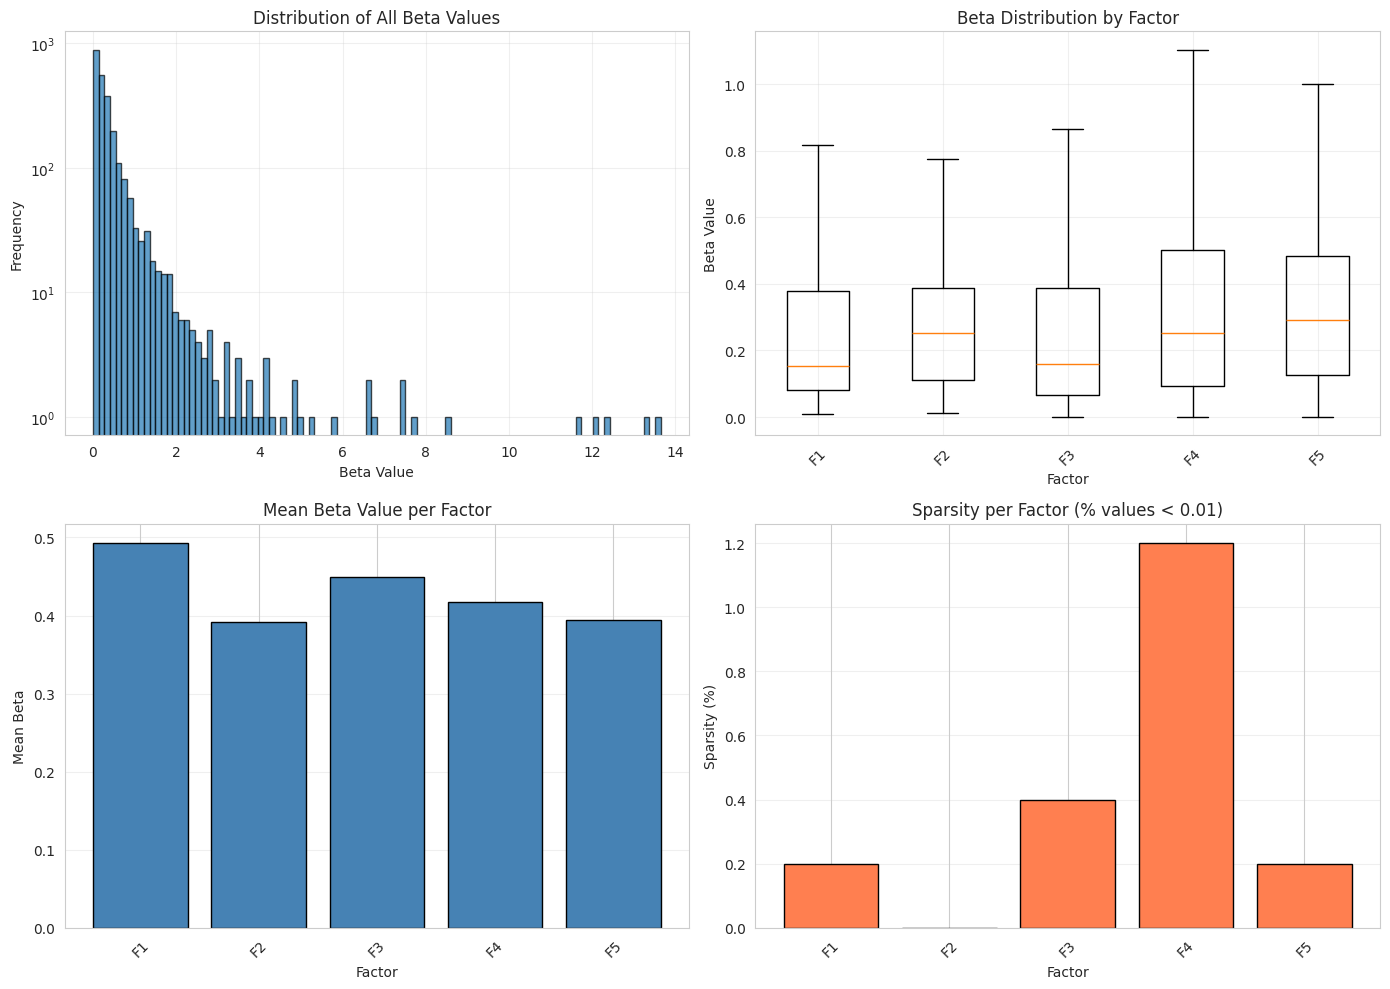


Beta Statistics:
Overall range: [0.0000, 13.6477]
Overall mean: 0.4292
Overall std: 0.8628
Overall sparsity (< 0.01): 0.40%

Per-factor statistics:
Factor 1: mean=0.4928, std=0.8472, sparsity=0.2%
Factor 2: mean=0.3920, std=0.7884, sparsity=0.0%
Factor 3: mean=0.4492, std=1.3560, sparsity=0.4%
Factor 4: mean=0.4179, std=0.5344, sparsity=1.2%
Factor 5: mean=0.3942, std=0.5015, sparsity=0.2%


In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Distribution of all beta values
axes[0, 0].hist(beta.flatten(), bins=100, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Beta Value')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of All Beta Values')
axes[0, 0].set_yscale('log')
axes[0, 0].grid(True, alpha=0.3)

# 2. Beta distribution per factor (boxplot)
axes[0, 1].boxplot([beta[:, i] for i in range(beta.shape[1])], 
                    labels=[f'F{i+1}' for i in range(beta.shape[1])],
                    showfliers=False)
axes[0, 1].set_xlabel('Factor')
axes[0, 1].set_ylabel('Beta Value')
axes[0, 1].set_title('Beta Distribution by Factor')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# 3. Mean beta per factor
mean_beta_per_factor = beta.mean(axis=0)
axes[1, 0].bar(range(beta.shape[1]), mean_beta_per_factor, color='steelblue', edgecolor='black')
axes[1, 0].set_xlabel('Factor')
axes[1, 0].set_ylabel('Mean Beta')
axes[1, 0].set_title('Mean Beta Value per Factor')
axes[1, 0].set_xticks(range(beta.shape[1]))
axes[1, 0].set_xticklabels([f'F{i+1}' for i in range(beta.shape[1])], rotation=45)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Sparsity per factor (% of values < 0.01)
sparsity_per_factor = (beta < 0.01).mean(axis=0) * 100
axes[1, 1].bar(range(beta.shape[1]), sparsity_per_factor, color='coral', edgecolor='black')
axes[1, 1].set_xlabel('Factor')
axes[1, 1].set_ylabel('Sparsity (%)')
axes[1, 1].set_title('Sparsity per Factor (% values < 0.01)')
axes[1, 1].set_xticks(range(beta.shape[1]))
axes[1, 1].set_xticklabels([f'F{i+1}' for i in range(beta.shape[1])], rotation=45)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('beta_distributions.png', dpi=150, bbox_inches='tight')
plt.show()

# Print summary statistics
print("\nBeta Statistics:")
print(f"Overall range: [{beta.min():.4f}, {beta.max():.4f}]")
print(f"Overall mean: {beta.mean():.4f}")
print(f"Overall std: {beta.std():.4f}")
print(f"Overall sparsity (< 0.01): {(beta < 0.01).mean()*100:.2f}%")
print(f"\nPer-factor statistics:")
for i in range(beta.shape[1]):
    print(f"Factor {i+1}: mean={beta[:, i].mean():.4f}, std={beta[:, i].std():.4f}, sparsity={(beta[:, i] < 0.01).mean()*100:.1f}%")

In [ ]:
corr = np.corrcoef(beta.T)  # Correlate factors, not genes
print(f"Mean correlation: {corr[np.triu_indices_from(corr, k=1)].mean():.4f}")


Mean correlation: 0.3611


In [ ]:
theta = model.E_theta  # Shape: (n_samples, n_factors)
print(f"Theta shape: {theta.shape}")

Theta shape: (100, 5)


/tmp/ipykernel_1703109/4024179985.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0, 1].boxplot([theta[:, i] for i in range(theta.shape[1])],


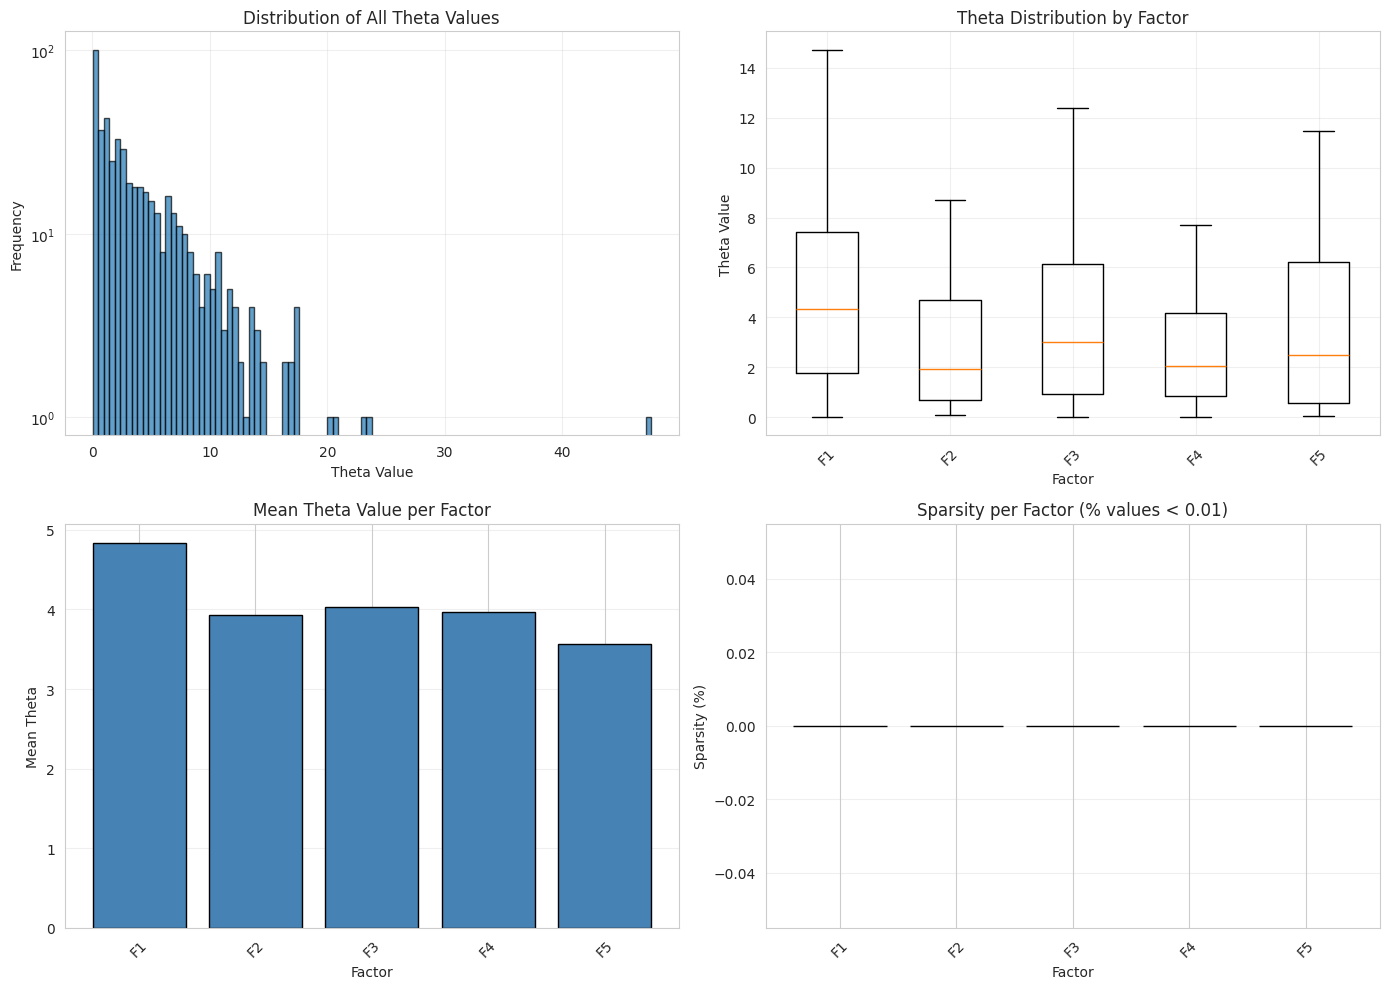


Theta Statistics:
Overall range: [0.0150, 47.5654]
Overall mean: 4.0638
Overall std: 4.6068
Overall sparsity (< 0.01): 0.00%

Per-factor statistics:
Factor 1: mean=4.8329, std=3.9583, sparsity=0.0%
Factor 2: mean=3.9267, std=6.0696, sparsity=0.0%
Factor 3: mean=4.0297, std=3.7010, sparsity=0.0%
Factor 4: mean=3.9695, std=5.1487, sparsity=0.0%
Factor 5: mean=3.5602, std=3.5390, sparsity=0.0%


In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Distribution of all theta values
axes[0, 0].hist(theta.flatten(), bins=100, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Theta Value')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of All Theta Values')
axes[0, 0].set_yscale('log')
axes[0, 0].grid(True, alpha=0.3)

# 2. Theta distribution per factor (boxplot)
axes[0, 1].boxplot([theta[:, i] for i in range(theta.shape[1])], 
                    labels=[f'F{i+1}' for i in range(theta.shape[1])],
                    showfliers=False)
axes[0, 1].set_xlabel('Factor')
axes[0, 1].set_ylabel('Theta Value')
axes[0, 1].set_title('Theta Distribution by Factor')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# 3. Mean theta per factor
mean_theta_per_factor = theta.mean(axis=0)
axes[1, 0].bar(range(theta.shape[1]), mean_theta_per_factor, color='steelblue', edgecolor='black')
axes[1, 0].set_xlabel('Factor')
axes[1, 0].set_ylabel('Mean Theta')
axes[1, 0].set_title('Mean Theta Value per Factor')
axes[1, 0].set_xticks(range(theta.shape[1]))
axes[1, 0].set_xticklabels([f'F{i+1}' for i in range(theta.shape[1])], rotation=45)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Sparsity per factor (% of values < 0.01)
sparsity_per_factor = (theta < 0.01).mean(axis=0) * 100
axes[1, 1].bar(range(theta.shape[1]), sparsity_per_factor, color='coral', edgecolor='black')
axes[1, 1].set_xlabel('Factor')
axes[1, 1].set_ylabel('Sparsity (%)')
axes[1, 1].set_title('Sparsity per Factor (% values < 0.01)')
axes[1, 1].set_xticks(range(theta.shape[1]))
axes[1, 1].set_xticklabels([f'F{i+1}' for i in range(theta.shape[1])], rotation=45)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('theta_distributions.png', dpi=150, bbox_inches='tight')
plt.show()

# Print summary statistics
print("\nTheta Statistics:")
print(f"Overall range: [{theta.min():.4f}, {theta.max():.4f}]")
print(f"Overall mean: {theta.mean():.4f}")
print(f"Overall std: {theta.std():.4f}")
print(f"Overall sparsity (< 0.01): {(theta < 0.01).mean()*100:.2f}%")
print(f"\nPer-factor statistics:")
for i in range(theta.shape[1]):
    print(f"Factor {i+1}: mean={theta[:, i].mean():.4f}, std={theta[:, i].std():.4f}, sparsity={(theta[:, i] < 0.01).mean()*100:.1f}%")
 

In [ ]:
v = model.mu_v  # Shape: (kappa, n_factors)
print(f"V-weight std: {v.std():.4f}")

V-weight std: 0.0815


In [ ]:
v

array([[ 0.05404722, -0.01515207,  0.15823328, -0.05480636,  0.12948069]])

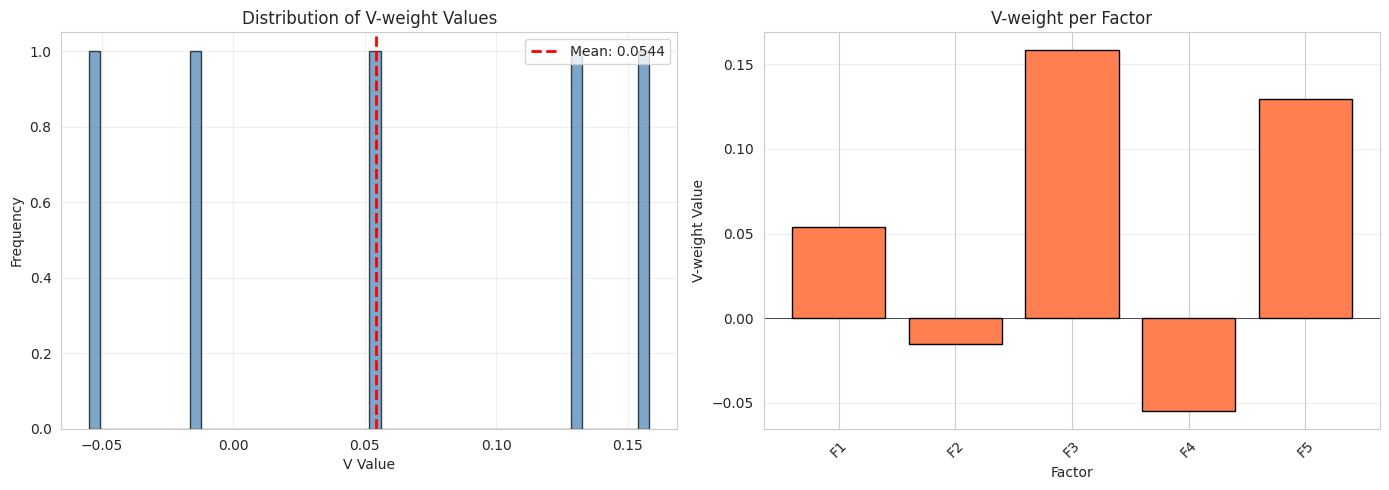


V-weight Statistics:
Shape: (1, 5)
Range: [-0.0548, 0.1582]
Mean: 0.0544
Std: 0.0815
Median: 0.0540

Per-factor values:
Factor 1: 0.0540
Factor 2: -0.0152
Factor 3: 0.1582
Factor 4: -0.0548
Factor 5: 0.1295


In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Distribution of v values
v_flat = v.flatten()
axes[0].hist(v_flat, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_xlabel('V Value')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of V-weight Values')
axes[0].axvline(v_flat.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {v_flat.mean():.4f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. V values per factor
v_per_factor = v[0, :]  # Shape is (1, n_factors), take first row
axes[1].bar(range(len(v_per_factor)), v_per_factor, color='coral', edgecolor='black')
axes[1].set_xlabel('Factor')
axes[1].set_ylabel('V-weight Value')
axes[1].set_title('V-weight per Factor')
axes[1].set_xticks(range(len(v_per_factor)))
axes[1].set_xticklabels([f'F{i+1}' for i in range(len(v_per_factor))], rotation=45)
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('v_weight_distributions.png', dpi=150, bbox_inches='tight')
plt.show()

# Print summary statistics
print("\nV-weight Statistics:")
print(f"Shape: {v.shape}")
print(f"Range: [{v.min():.4f}, {v.max():.4f}]")
print(f"Mean: {v.mean():.4f}")
print(f"Std: {v.std():.4f}")
print(f"Median: {np.median(v):.4f}")
print(f"\nPer-factor values:")
for i in range(v.shape[1]):
    print(f"Factor {i+1}: {v[0, i]:.4f}")

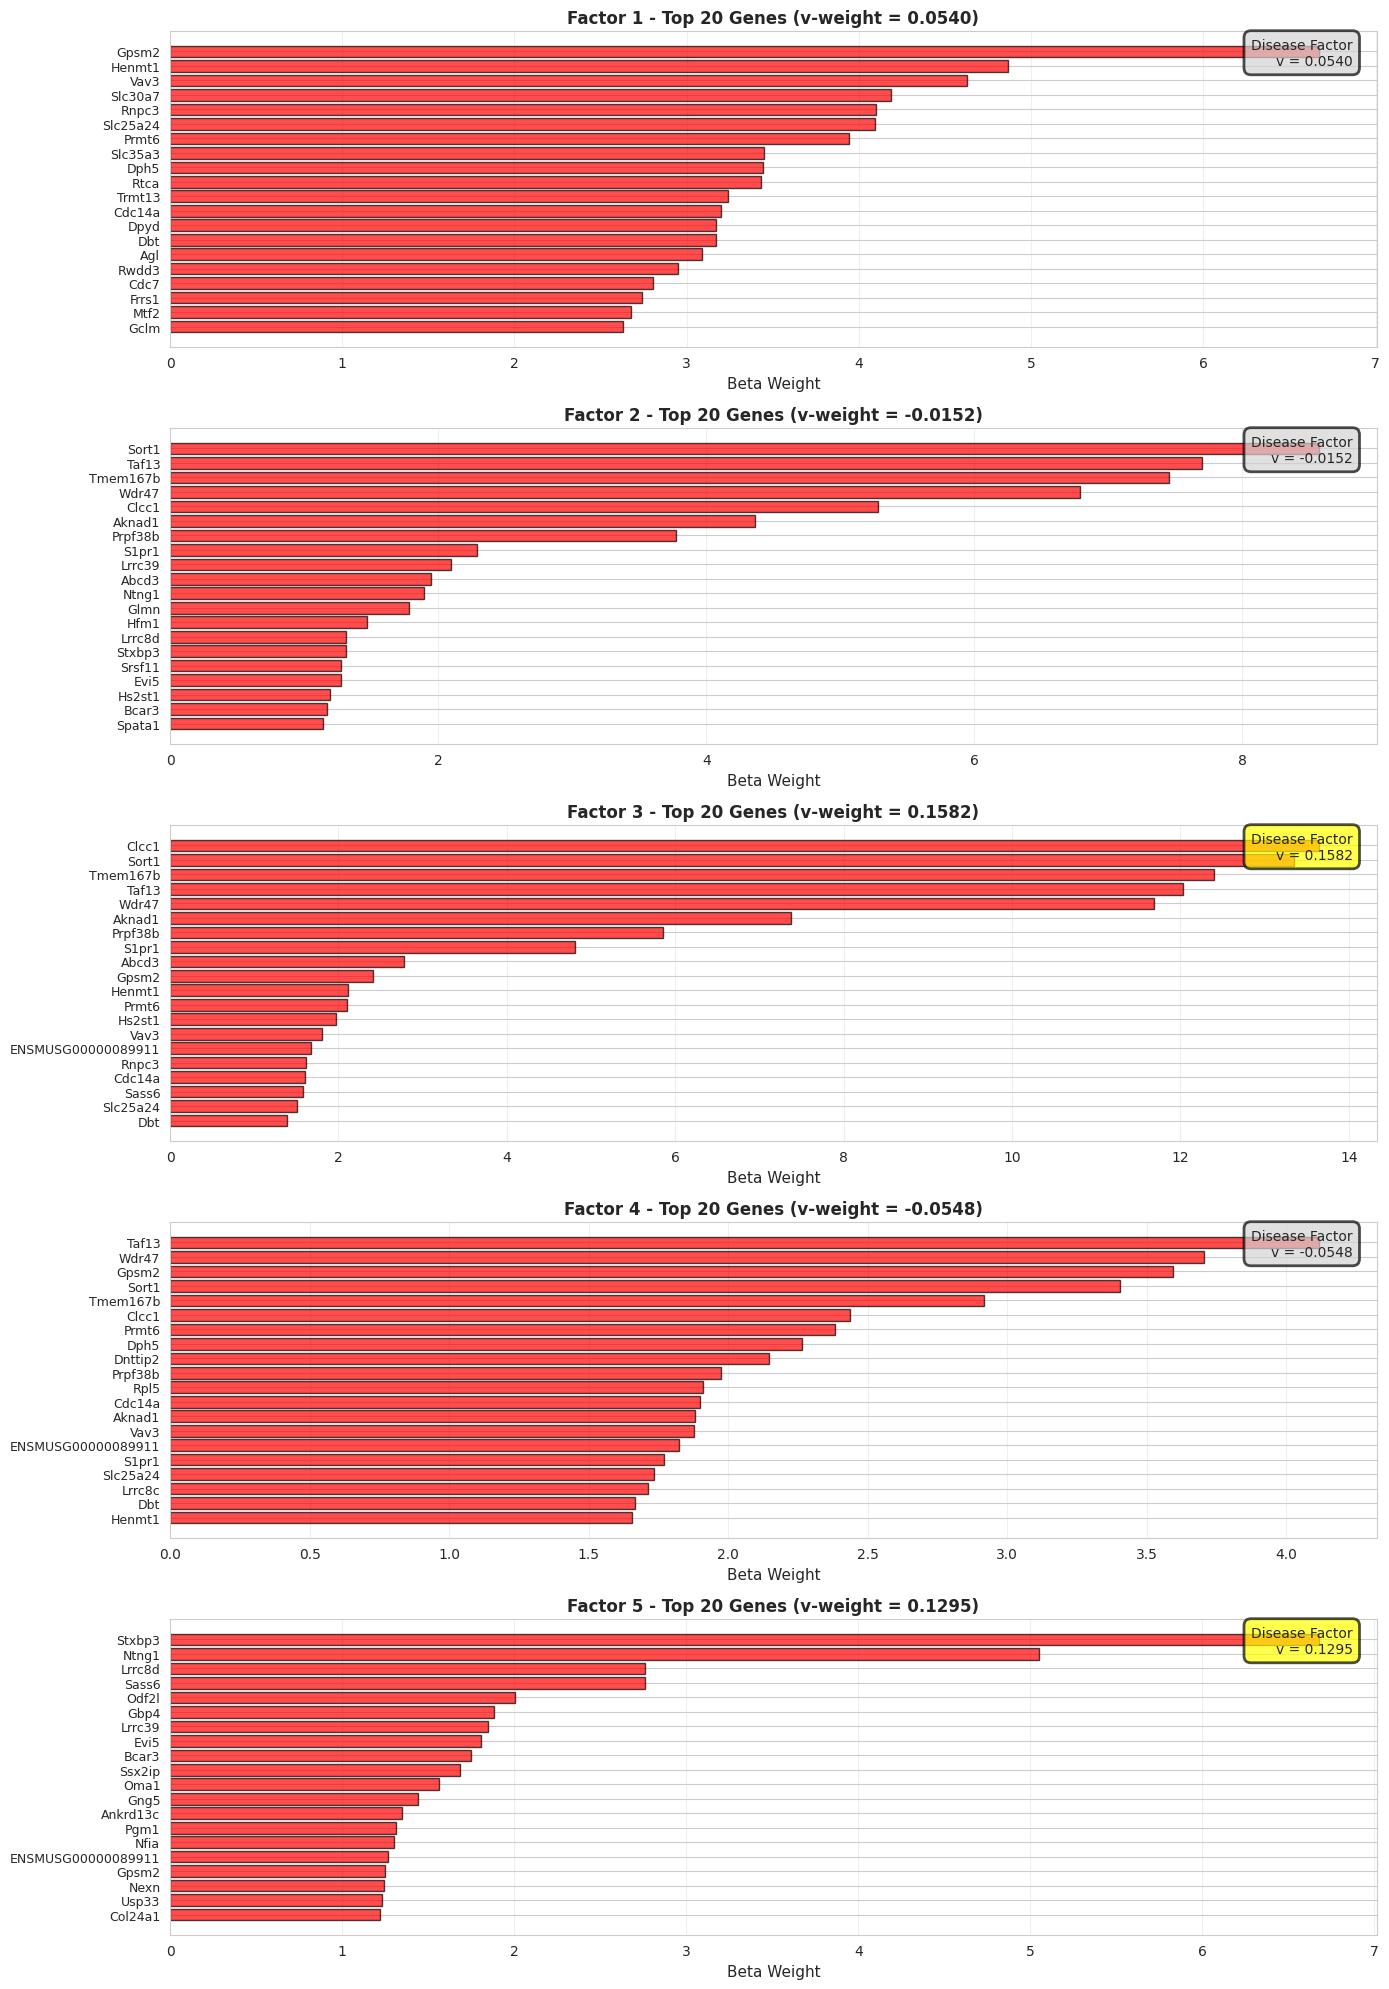


Summary of Factor Disease Contributions:
Factor 1: v-weight = 0.0540, Mean beta = 0.4928, Max beta = 6.6732
Factor 2: v-weight = -0.0152, Mean beta = 0.3920, Max beta = 8.5725
Factor 3: v-weight = 0.1582, Mean beta = 0.4492, Max beta = 13.6477
Factor 4: v-weight = -0.0548, Mean beta = 0.4179, Max beta = 4.1178
Factor 5: v-weight = 0.1295, Mean beta = 0.3942, Max beta = 6.6794


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get gene names for the genes in the model
gene_names_in_model = train_data.columns.tolist()

# Convert Ensembl IDs to gene symbols
gene_symbols_in_model = []
for ensembl_id in gene_names_in_model:
    if ensembl_id in gene_annotation_ensembl_map.values():
        # Find the symbol that maps to this Ensembl ID
        symbol = [k for k, v in gene_annotation_ensembl_map.items() if v == ensembl_id]
        if symbol:
            gene_symbols_in_model.append(symbol[0])
        else:
            gene_symbols_in_model.append(ensembl_id)
    else:
        gene_symbols_in_model.append(ensembl_id)

# Create plots for first 5 factors
fig, axes = plt.subplots(5, 1, figsize=(14, 20))

for factor_idx in range(5):
    ax = axes[factor_idx]
    
    # Get beta values for this factor
    beta_factor = beta[:, factor_idx]
    
    # Get top 20 genes
    top_20_idx = np.argsort(beta_factor)[-20:][::-1]
    top_20_genes = [gene_symbols_in_model[i] for i in top_20_idx]
    top_20_weights = beta_factor[top_20_idx]
    
    # Get v-weight for this factor (disease contribution)
    v_weight = v[0, factor_idx]
    
    # Create barplot
    y_pos = np.arange(len(top_20_genes))
    colors = ['red' if w > 0 else 'blue' for w in top_20_weights]
    
    ax.barh(y_pos, top_20_weights, color=colors, edgecolor='black', alpha=0.7)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(top_20_genes, fontsize=9)
    ax.set_xlabel('Beta Weight', fontsize=11)
    ax.set_title(f'Factor {factor_idx + 1} - Top 20 Genes (v-weight = {v_weight:.4f})', 
                 fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='x')
    
    # Add v-weight indicator box
    bbox_props = dict(boxstyle='round,pad=0.5', facecolor='yellow' if abs(v_weight) > 0.1 else 'lightgray', 
                      alpha=0.7, edgecolor='black', linewidth=2)
    ax.text(0.98, 0.98, f'Disease Factor\nv = {v_weight:.4f}', 
            transform=ax.transAxes, fontsize=10, verticalalignment='top', 
            horizontalalignment='right', bbox=bbox_props)
    
    # Invert y-axis to show highest weight at top
    ax.invert_yaxis()

plt.tight_layout()
plt.savefig('top_5_factors_disease_genes.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nSummary of Factor Disease Contributions:")
for i in range(5):
    print(f"Factor {i+1}: v-weight = {v[0, i]:.4f}, "
          f"Mean beta = {beta[:, i].mean():.4f}, "
          f"Max beta = {beta[:, i].max():.4f}")

In [ ]:
# Check gene programs size
print("Gene Programs Analysis:")
print(f"Number of programs (factors): {beta.shape[1]}")
print(f"Number of genes per program: {beta.shape[0]}")
print(f"Total beta matrix size: {beta.shape}")
print(f"\n{'='*60}")

# For each factor, count non-sparse genes (beta > threshold)
thresholds = [0.01, 0.1, 0.5, 1.0]

for threshold in thresholds:
    print(f"\nGenes per program with beta > {threshold}:")
    for i in range(beta.shape[1]):
        n_genes = (beta[:, i] > threshold).sum()
        print(f"  Factor {i+1}: {n_genes} genes ({n_genes/beta.shape[0]*100:.1f}%)")

# Summary statistics
print(f"\n{'='*60}")
print("Program Size Summary (using beta > 0.1 threshold):")
program_sizes = [(beta[:, i] > 0.1).sum() for i in range(beta.shape[1])]
print(f"  Mean program size: {np.mean(program_sizes):.1f} genes")
print(f"  Median program size: {np.median(program_sizes):.1f} genes")
print(f"  Min program size: {np.min(program_sizes)} genes")
print(f"  Max program size: {np.max(program_sizes)} genes")
print(f"  Std: {np.std(program_sizes):.1f} genes")

Gene Programs Analysis:
Number of programs (factors): 5
Number of genes per program: 500
Total beta matrix size: (500, 5)


Genes per program with beta > 0.01:
  Factor 1: 499 genes (99.8%)
  Factor 2: 500 genes (100.0%)
  Factor 3: 498 genes (99.6%)
  Factor 4: 494 genes (98.8%)
  Factor 5: 499 genes (99.8%)

Genes per program with beta > 0.1:
  Factor 1: 332 genes (66.4%)
  Factor 2: 384 genes (76.8%)
  Factor 3: 316 genes (63.2%)
  Factor 4: 371 genes (74.2%)
  Factor 5: 411 genes (82.2%)

Genes per program with beta > 0.5:
  Factor 1: 112 genes (22.4%)
  Factor 2: 78 genes (15.6%)
  Factor 3: 94 genes (18.8%)
  Factor 4: 126 genes (25.2%)
  Factor 5: 120 genes (24.0%)

Genes per program with beta > 1.0:
  Factor 1: 78 genes (15.6%)
  Factor 2: 26 genes (5.2%)
  Factor 3: 31 genes (6.2%)
  Factor 4: 50 genes (10.0%)
  Factor 5: 28 genes (5.6%)

Program Size Summary (using beta > 0.1 threshold):
  Mean program size: 362.8 genes
  Median program size: 371.0 genes
  Min program size: 3

In [ ]:
# Load ground truth genes from the synthetic data generation
ground_truth_path = '/labs/Aguiar/SSPA_BRAY/BRay/synthetic_disease/ground_truth_genes.txt'

# Read ground truth genes
with open(ground_truth_path, 'r') as f:
    ground_truth_genes = [line.strip() for line in f.readlines()]

print(f"Loaded {len(ground_truth_genes)} ground truth genes")
print(f"First 10 ground truth genes: {ground_truth_genes[:10]}")

# Check how many ground truth genes are in our gene list
genes_in_model = train_data.columns.tolist()
ground_truth_in_model = [g for g in ground_truth_genes if g in genes_in_model]

print(f"\nGround truth genes present in model: {len(ground_truth_in_model)}/{len(ground_truth_genes)}")
print(f"Percentage: {len(ground_truth_in_model)/len(ground_truth_genes)*100:.2f}%")

if ground_truth_in_model:
    print(f"\nGround truth genes in model:")
    print(ground_truth_in_model)
    
    # Check which factor they're most loaded on
    print("\n=== Ground Truth Gene Factor Loadings ===")
    for gene in ground_truth_in_model:
        gene_idx = genes_in_model.index(gene)
        gene_loadings = beta[gene_idx, :]
        best_factor = np.argmax(gene_loadings)
        best_loading = gene_loadings[best_factor]
        print(f"{gene}: Factor {best_factor+1} (loading={best_loading:.4f})")
else:
    print("\nNo ground truth genes found in the model")
    print("This might be because:")
    print("1. Ground truth genes were filtered out during preprocessing")
    print("2. Gene IDs don't match (check if conversion is needed)")

FileNotFoundError: [Errno 2] No such file or directory: '/labs/Aguiar/SSPA_BRAY/BRay/synthetic_disease/ground_truth_genes.txt'

In [ ]:
# Load gene list from file
with open('/labs/Aguiar/SSPA_BRAY/BRay/synthetic_disease/gene_list.txt', 'r') as f:
    gene_list = [line.strip() for line in f.readlines()]

print(f"Loaded {len(gene_list)} genes from gene_list.txt")

# Convert Ensembl IDs to gene symbols
gene_symbols = []
for ensembl_id in gene_list:
    if ensembl_id in gene_annotation_ensembl_map.values():
        # Find the symbol that maps to this Ensembl ID
        symbol = [k for k, v in gene_annotation_ensembl_map.items() if v == ensembl_id]
        if symbol:
            gene_symbols.append(symbol[0])
        else:
            gene_symbols.append(ensembl_id)
    else:
        gene_symbols.append(ensembl_id)

print(f"Converted {len(gene_symbols)} genes to symbols")
print(f"First 10 genes: {gene_symbols[:10]}")

Loaded 9860 genes from gene_list.txt
Converted 9860 genes to symbols
First 10 genes: ['Noc2l', 'Isg15', 'Tnfrsf18', 'Sdf4', 'B3galt6', 'Ube2j2', 'Acap3', 'Pusl1', 'ENSMUSG00000029034', 'Dvl1']


In [ ]:
with open('/labs/Aguiar/SSPA_BRAY/BRay/synthetic_superstrong/progressive_validation/stage_1:_small_model.pkl', 'rb') as f:
    model = pickle.load(f)

NameError: name 'pickle' is not defined

In [ ]:
model

In [ ]:
beta = model.E_beta  # Shape: (n_genes, n_factors)
print(f"Beta shape: {beta.shape}")
print(f"Beta range: [{beta.min():.4f}, {beta.max():.4f}]")

Beta shape: (500, 5)
Beta range: [0.0000, 9.9595]


In [ ]:
# Convert beta to DataFrame for better visualization
beta_df = pd.DataFrame(
    beta,
    columns=[f'Factor_{i+1}' for i in range(beta.shape[1])],
    index=train_data.columns[:beta.shape[0]]  # Use gene IDs as index
)

beta_df

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5
ENSMUSG00000095567,0.191670,0.138195,0.023999,0.042551,0.057183
ENSMUSG00000035692,0.058688,0.241428,0.042726,0.071990,0.076846
ENSMUSG00000041954,0.174285,0.075856,0.181457,0.298743,0.130317
ENSMUSG00000029076,0.297128,0.217947,0.092680,0.193894,0.141841
ENSMUSG00000050796,0.348072,0.037470,0.290916,0.053648,0.278631
...,...,...,...,...,...
ENSMUSG00000027884,3.932087,7.952905,7.507201,2.218177,0.510968
ENSMUSG00000040389,4.388808,8.902413,7.663169,2.111173,0.846665
ENSMUSG00000048100,3.388769,8.706048,8.121327,1.830999,1.033989
ENSMUSG00000068732,1.489660,0.038802,6.285203,9.959460,0.525735


In [ ]:
import pickle

with open('/labs/Aguiar/SSPA_BRAY/BRay/synthetic_strong/progressive_validation/stage_1:_small_results.pkl', 'rb') as f:
    stage1_results = pickle.load(f)

stage1_results

{'stage': 'Stage 1: Small',
 'n_samples': 300,
 'time': 6548.455134630203,
 'f1': 0.09142857142857143,
 'precision': 0.32,
 'recall': 0.05333333333333334,
 'auc': 0.9255986682033551,
 'best_factor': 7,
 'v_weight': np.float64(0.05271148866948121),
 'final_elbo': np.float64(-4209773.770136933)}

In [39]:
import pickle

with open('/labs/Aguiar/SSPA_BRAY/BRay/synthetic_superstrong/progressive_validation/stage_1:_small_model.pkl', 'rb') as f:
    model_superstrong = pickle.load(f)

model_superstrong

{'model': <vi.VI at 0x7ff8d0366750>,
 'E_beta': array([[3.15506975e-02, 4.76079014e-02, 7.49999645e-02, ...,
         5.95863166e-02, 4.62913486e-02, 2.49066957e-02],
        [4.26241370e-02, 9.84987256e-02, 7.96680907e-05, ...,
         2.41356627e-02, 6.93244240e-02, 3.28710139e-02],
        [4.84115625e-06, 7.38164190e-06, 2.15292970e-01, ...,
         4.49472107e-06, 1.47224293e-05, 6.01836814e-06],
        ...,
        [1.01915934e+01, 4.75642275e+00, 6.19104600e-01, ...,
         6.40783427e+00, 2.39789278e+00, 2.01150995e+01],
        [2.56153795e+00, 6.62464873e-01, 1.67335987e+00, ...,
         7.95684366e+00, 2.90620317e+00, 3.17845883e+00],
        [1.86086012e-01, 1.02243403e-01, 5.03752676e-01, ...,
         1.38431086e+00, 7.16900950e-01, 5.49008539e-01]], shape=(9860, 15)),
 'E_theta': array([[1.85682893e-01, 2.73004002e-03, 3.44846289e-03, ...,
         1.52739782e-02, 2.29931767e-03, 5.87165360e-01],
        [1.20709030e-02, 3.29680698e-03, 9.60786549e-03, ...,
       

In [42]:
# Extract the arrays from the model
E_beta = model_superstrong['E_beta']
E_theta = model_superstrong['E_theta']
mu_v = model_superstrong['mu_v']

print("Loaded arrays from model_superstrong:")
print(f"E_beta shape: {E_beta.shape}")
print(f"E_theta shape: {E_theta.shape}")
print(f"mu_v shape: {mu_v.shape}")
print(f"\nmu_v values:\n{mu_v}")

Loaded arrays from model_superstrong:
E_beta shape: (9860, 15)
E_theta shape: (300, 15)
mu_v shape: (1, 15)

mu_v values:
[[-0.3136889  -0.0252747   0.08682275 -0.10500356  0.4747205   0.23046748
   0.35191624  0.13571069 -0.21319006  0.128903    0.27344709  0.23647023
   0.42405759  0.18342293 -0.30878446]]


In [46]:
# Convert E_beta to DataFrame
E_beta_df = pd.DataFrame(
    E_beta,
    columns=[f'Factor_{i+1}' for i in range(E_beta.shape[1])],
    index=train_data.columns[:E_beta.shape[0]]  # Use gene IDs as index
)

E_beta_df

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7,Factor_8,Factor_9,Factor_10,Factor_11,Factor_12,Factor_13,Factor_14,Factor_15
ENSMUSG00000095567,0.031551,0.047608,0.075000,0.044684,0.130879,0.069730,0.182183,0.109986,0.034547,0.155749,0.027475,0.039235,0.059586,0.046291,0.024907
ENSMUSG00000035692,0.042624,0.098499,0.000080,0.070727,0.025756,0.042399,0.028332,0.108808,0.056437,0.080125,0.078395,0.044938,0.024136,0.069324,0.032871
ENSMUSG00000041954,0.000005,0.000007,0.215293,0.000010,0.000002,0.000014,0.000007,0.000026,0.000008,0.000015,0.000008,0.000012,0.000004,0.000015,0.000006
ENSMUSG00000029076,0.049608,0.108038,0.137912,0.064109,0.095335,0.045455,0.416910,0.217565,0.060224,0.052310,0.060198,0.172398,0.085487,0.125254,0.100441
ENSMUSG00000050796,0.046506,0.000007,0.000020,0.000010,0.000002,0.000013,0.052891,0.000023,0.000010,0.000015,0.000007,0.000012,0.000004,0.000013,0.000006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000064356,13.695118,5.477751,0.755334,32.136168,16.161373,14.985957,3.639957,49.046079,0.168505,7.196294,6.050720,36.265505,10.945442,3.236916,25.298907
ENSMUSG00000064357,1.353414,1.320951,0.807757,1.774358,3.875172,2.466968,1.086519,4.248513,0.297899,1.467794,1.247636,6.174673,2.649648,0.922393,1.392255
ENSMUSG00000064358,10.191593,4.756423,0.619105,29.333734,5.793758,6.719618,1.278477,21.386775,1.561567,5.320241,6.724972,22.511375,6.407834,2.397893,20.115100
ENSMUSG00000064360,2.561538,0.662465,1.673360,6.338548,10.394544,6.164872,4.873381,22.425637,0.998396,6.231040,7.366589,19.471008,7.956844,2.906203,3.178459


In [47]:
# Convert mu_v to a DataFrame for better visualization
mu_v_df = pd.DataFrame(
    model_superstrong['mu_v'],
    columns=[f'Factor_{i+1}' for i in range(model_superstrong['mu_v'].shape[1])],
    index=['Disease_Effect']
)

mu_v_df

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7,Factor_8,Factor_9,Factor_10,Factor_11,Factor_12,Factor_13,Factor_14,Factor_15
Disease_Effect,-0.313689,-0.025275,0.086823,-0.105004,0.47472,0.230467,0.351916,0.135711,-0.21319,0.128903,0.273447,0.23647,0.424058,0.183423,-0.308784


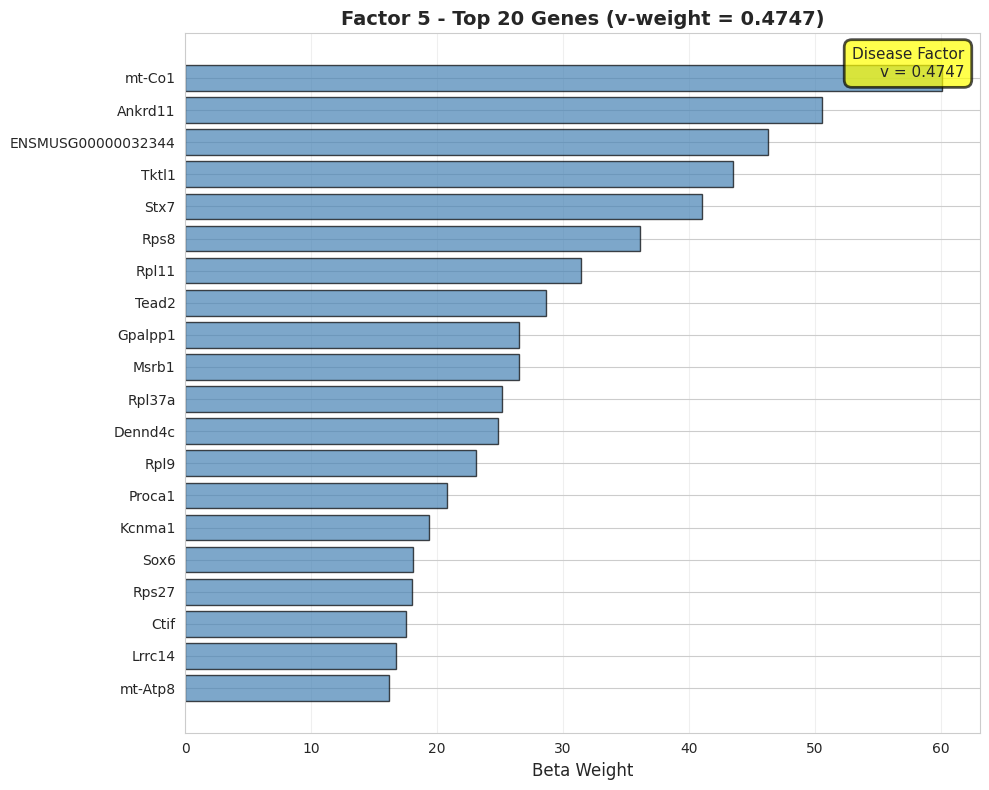


Factor 5 Summary:
V-weight: 0.4747
Mean beta: 0.2107
Max beta: 60.1176

Top 20 genes:
 1. mt-Co1          : 60.1176
 2. Ankrd11         : 50.6089
 3. ENSMUSG00000032344 : 46.2761
 4. Tktl1           : 43.5115
 5. Stx7            : 41.0452
 6. Rps8            : 36.1478
 7. Rpl11           : 31.4035
 8. Tead2           : 28.6527
 9. Gpalpp1         : 26.5086
10. Msrb1           : 26.4670
11. Rpl37a          : 25.1483
12. Dennd4c         : 24.7944
13. Rpl9            : 23.0503
14. Proca1          : 20.7555
15. Kcnma1          : 19.3100
16. Sox6            : 18.0837
17. Rps27           : 18.0136
18. Ctif            : 17.4933
19. Lrrc14          : 16.6994
20. mt-Atp8         : 16.1614


In [49]:
import numpy as np

import matplotlib.pyplot as plt

# Get beta values for factor 5
factor_idx = 4  # 0-indexed, so factor 5 is index 4
beta_factor5 = E_beta[:, factor_idx]

# Get top 20 genes for factor 5
top_20_idx = np.argsort(beta_factor5)[-20:][::-1]
top_20_ensembl = [train_data.columns[i] for i in top_20_idx]
top_20_weights = beta_factor5[top_20_idx]

# Convert Ensembl IDs to gene symbols
top_20_symbols = []
for ensembl_id in top_20_ensembl:
    # Find the symbol that maps to this Ensembl ID
    symbol = [k for k, v in gene_annotation_ensembl_map.items() if v == ensembl_id]
    if symbol:
        top_20_symbols.append(symbol[0])
    else:
        # If no symbol found, use the Ensembl ID
        top_20_symbols.append(ensembl_id)

# Get v-weight for factor 5
v_weight_factor5 = mu_v[0, factor_idx]

# Create barplot
fig, ax = plt.subplots(figsize=(10, 8))

y_pos = np.arange(len(top_20_symbols))
colors = ['steelblue'] * len(top_20_symbols)

ax.barh(y_pos, top_20_weights, color=colors, edgecolor='black', alpha=0.7)
ax.set_yticks(y_pos)
ax.set_yticklabels(top_20_symbols, fontsize=10)
ax.set_xlabel('Beta Weight', fontsize=12)
ax.set_title(f'Factor 5 - Top 20 Genes (v-weight = {v_weight_factor5:.4f})', 
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')

# Add v-weight indicator box
bbox_props = dict(boxstyle='round,pad=0.5', 
                  facecolor='yellow' if abs(v_weight_factor5) > 0.1 else 'lightgray', 
                  alpha=0.7, edgecolor='black', linewidth=2)
ax.text(0.98, 0.98, f'Disease Factor\nv = {v_weight_factor5:.4f}', 
        transform=ax.transAxes, fontsize=11, verticalalignment='top', 
        horizontalalignment='right', bbox=bbox_props)

# Invert y-axis to show highest weight at top
ax.invert_yaxis()

plt.tight_layout()
plt.savefig('factor5_top20_genes.png', dpi=150, bbox_inches='tight')
plt.show()

# Print summary
print(f"\nFactor 5 Summary:")
print(f"V-weight: {v_weight_factor5:.4f}")
print(f"Mean beta: {beta_factor5.mean():.4f}")
print(f"Max beta: {beta_factor5.max():.4f}")
print(f"\nTop 20 genes:")
for i, (gene, weight) in enumerate(zip(top_20_symbols, top_20_weights), 1):
    print(f"{i:2d}. {gene:15s} : {weight:.4f}")

In [61]:
# Define beta threshold
beta_threshold = 1.0

# Get disease genes
with open('/labs/Aguiar/SSPA_BRAY/BRay/synthetic_superstrong/ground_truth.json', 'r') as f:
    ground_truth = json.load(f)

disease_gene_ensembl = ground_truth['disease_gene_names']
genes_in_model = train_data.columns.tolist()

print("="*80)
print("FACTOR ANALYSIS: Genes with Beta > 1.0")
print("="*80)

# Analyze each factor
for factor_idx in range(15):
    beta_factor = E_beta[:, factor_idx]
    v_weight = mu_v[0, factor_idx]
    
    # Get genes above threshold
    genes_above_threshold_idx = np.where(beta_factor > beta_threshold)[0]
    n_genes = len(genes_above_threshold_idx)
    
    # Get Ensembl IDs for these genes
    gene_ensembl_ids = [genes_in_model[i] for i in genes_above_threshold_idx]
    
    # Check how many are disease genes
    disease_genes_in_factor = [g for g in gene_ensembl_ids if g in disease_gene_ensembl]
    n_disease_genes = len(disease_genes_in_factor)
    
    # Convert disease genes to symbols for display
    disease_symbols = []
    for ensembl_id in disease_genes_in_factor:
        symbol = [k for k, v in gene_annotation_ensembl_map.items() if v == ensembl_id]
        if symbol:
            disease_symbols.append(symbol[0])
        else:
            disease_symbols.append(ensembl_id)
    
    print(f"\nFactor {factor_idx + 1}:")
    print(f"  V-weight: {v_weight:.4f}")
    print(f"  Total genes (beta > {beta_threshold}): {n_genes}")
    print(f"  Disease genes in factor: {n_disease_genes}")
    print(f"  Percentage of disease genes: {(n_disease_genes/n_genes*100) if n_genes > 0 else 0:.2f}%")
    print(f"  Percentage of all disease genes: {(n_disease_genes/len(disease_gene_ensembl)*100):.2f}%")
    
    if n_disease_genes > 0:
        print(f"  Disease genes: {', '.join(disease_symbols)}")

# Summary table
print("\n" + "="*80)
print("SUMMARY TABLE")
print("="*80)
print(f"{'Factor':<10} {'V-weight':<12} {'Total Genes':<15} {'Disease Genes':<15} {'% Disease':<12} {'% of All Disease':<18}")
print("-"*80)

for factor_idx in range(15):
    beta_factor = E_beta[:, factor_idx]
    v_weight = mu_v[0, factor_idx]
    
    genes_above_threshold_idx = np.where(beta_factor > beta_threshold)[0]
    n_genes = len(genes_above_threshold_idx)
    
    gene_ensembl_ids = [genes_in_model[i] for i in genes_above_threshold_idx]
    disease_genes_in_factor = [g for g in gene_ensembl_ids if g in disease_gene_ensembl]
    n_disease_genes = len(disease_genes_in_factor)
    
    pct_disease = (n_disease_genes/n_genes*100) if n_genes > 0 else 0
    pct_all_disease = (n_disease_genes/len(disease_gene_ensembl)*100)
    
    print(f"Factor {factor_idx+1:<3} {v_weight:<12.4f} {n_genes:<15} {n_disease_genes:<15} {pct_disease:<12.1f} {pct_all_disease:<18.1f}")

print(f"\nTotal disease genes in ground truth: {len(disease_gene_ensembl)}")

# Create dictionary to store factor analysis results
factor_analysis_results = {}

for factor_idx in range(15):
    beta_factor = E_beta[:, factor_idx]
    v_weight = mu_v[0, factor_idx]
    
    # Get genes above threshold
    genes_above_threshold_idx = np.where(beta_factor > beta_threshold)[0]
    gene_ensembl_ids = [genes_in_model[i] for i in genes_above_threshold_idx]
    
    # Get disease genes in this factor
    disease_genes_in_factor = [g for g in gene_ensembl_ids if g in disease_gene_ensembl]
    
    # Convert to symbols
    gene_symbols = []
    for ensembl_id in gene_ensembl_ids:
        symbol = [k for k, v in gene_annotation_ensembl_map.items() if v == ensembl_id]
        gene_symbols.append(symbol[0] if symbol else ensembl_id)
    
    disease_symbols = []
    for ensembl_id in disease_genes_in_factor:
        symbol = [k for k, v in gene_annotation_ensembl_map.items() if v == ensembl_id]
        disease_symbols.append(symbol[0] if symbol else ensembl_id)
    
    # Store in dictionary
    factor_analysis_results[f'Factor_{factor_idx + 1}'] = {
        'v_weight': v_weight,
        'total_genes': len(genes_above_threshold_idx),
        'disease_genes_count': len(disease_genes_in_factor),
        'all_genes_ensembl': gene_ensembl_ids,
        'all_genes_symbols': gene_symbols,
        'disease_genes_ensembl': disease_genes_in_factor,
        'disease_genes_symbols': disease_symbols,
        'beta_values': beta_factor[genes_above_threshold_idx].tolist()
    }

print(f"\nSaved results for {len(factor_analysis_results)} factors")
print(f"Dictionary keys: {list(factor_analysis_results.keys())}")

FACTOR ANALYSIS: Genes with Beta > 1.0

Factor 1:
  V-weight: -0.3137
  Total genes (beta > 1.0): 267
  Disease genes in factor: 75
  Percentage of disease genes: 28.09%
  Percentage of all disease genes: 2.50%
  Disease genes: Prdm2, Rpl11, Laptm5, Rps8, Rpl5, Rabgap1l, Ptprc, Ypel5, Zfp36l2, Rpl31, Arhgap15, Stk17b, Rpl37a, Rpsa, Setd2, Atp11b, Rpl9, Nfkb1, Rgmb, Thg1l, Btnl9, Mdga1, Tulp4, Herpud2, Lhfpl3, Ndufb2, Galnt11, Matn2, Ankrd46, Naprt, Lrrc14, Dennd4c, Prpf18, Sfxn4, Stk33, Sox6, Apip, Fads3, Neu3, Birc3, C2cd5, Itgb7, Krr1, Poc1b, Utp20, Plbd2, Cdk8, Ubl3, Foxo1, Mettl17, Pygl, Map3k9, Spg11, Leo1, Lactb, Celf6, Msrb1, ENSMUSG00000030982, Ankrd11, Proca1, Aarsd1, Scpep1, Yes1, Rab12, Ndufs7, Il27ra, Ell, Tead2, Rbm12, Frmpd4, Ptchd1, Ube2a, Ddx3y, mt-Nd2, mt-Atp6

Factor 2:
  V-weight: -0.0253
  Total genes (beta > 1.0): 234
  Disease genes in factor: 66
  Percentage of disease genes: 28.21%
  Percentage of all disease genes: 2.20%
  Disease genes: Prdm2, Rpl11, Srrm1, Sm

Total unique genes across all factors: 1143


/tmp/ipykernel_3248734/471521147.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.0294479208215424' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gene_factor_matrix.loc[gene_ensembl, factor_name] = beta_val
/tmp/ipykernel_3248734/471521147.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.010068168912714' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gene_factor_matrix.loc[gene_ensembl, factor_name] = beta_val
/tmp/ipykernel_3248734/471521147.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.198624329956976' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gene_factor_matrix.loc[gene_ensembl, factor_na


GENES APPEARING IN MULTIPLE FACTORS
Number of genes in multiple factors: 770

Top 20 genes by number of factors:
ENSMUSG00000036412    15
ENSMUSG00000056673    15
ENSMUSG00000033396    15
ENSMUSG00000068457    14
ENSMUSG00000022008    14
ENSMUSG00000032344    14
ENSMUSG00000030796    14
ENSMUSG00000059291    14
ENSMUSG00000014932    14
ENSMUSG00000057637    14
ENSMUSG00000019952    14
ENSMUSG00000028233    14
ENSMUSG00000035569    14
ENSMUSG00000026395    14
ENSMUSG00000049744    14
ENSMUSG00000020268    14
ENSMUSG00000064354    14
ENSMUSG00000064358    14
ENSMUSG00000064351    14
ENSMUSG00000037138    13
dtype: int64

GENES IN FACTORS WITH OPPOSITE V-WEIGHT SIGNS
Number of such genes: 435

First 10 examples:

1. Arsi (ENSMUSG00000036412)
   Factor_1: v-weight=-0.3137, beta=7.74
   Factor_2: v-weight=-0.0253, beta=8.86
   Factor_3: v-weight=0.0868, beta=4.96
   Factor_4: v-weight=-0.1050, beta=16.10
   Factor_5: v-weight=0.4747, beta=4.76
   Factor_6: v-weight=0.2305, beta=3.81
   Fac

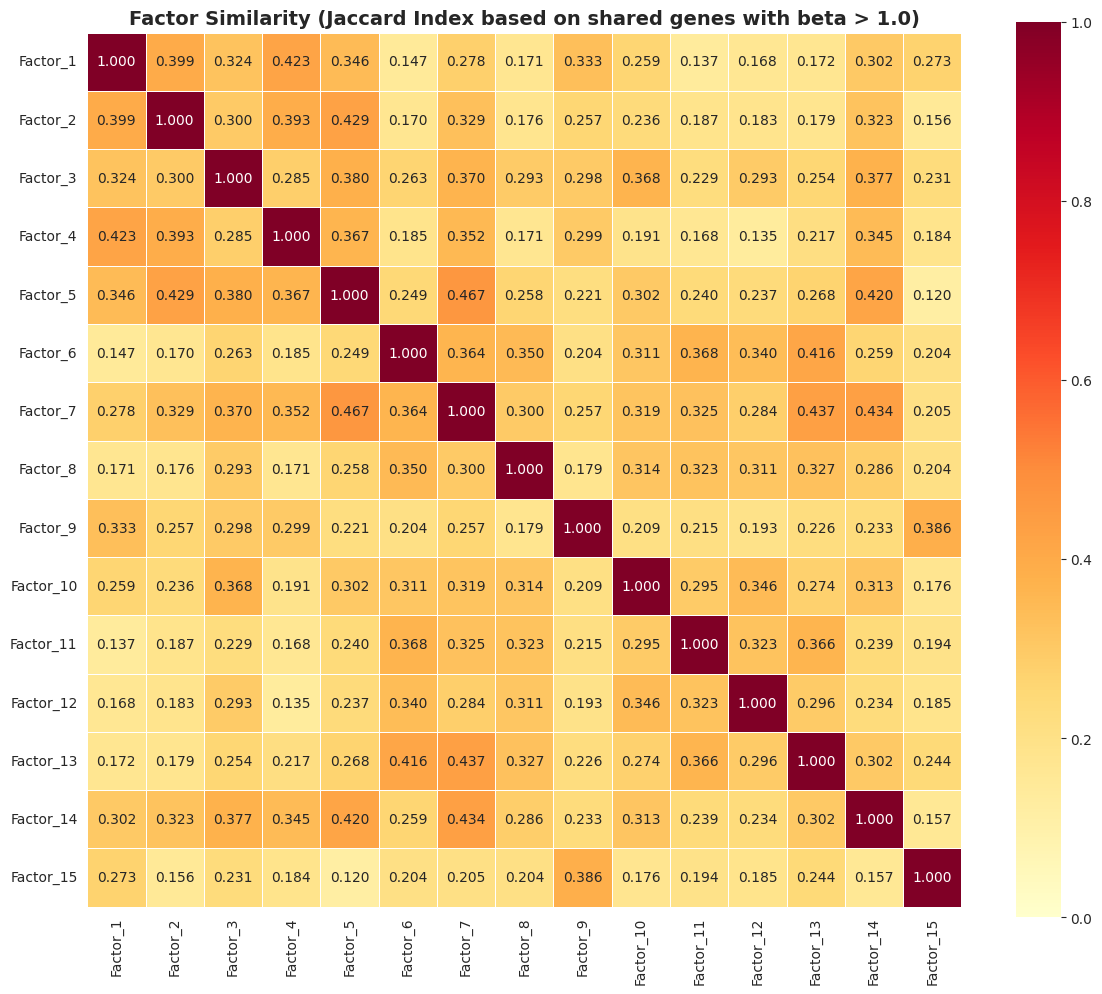


FACTOR OVERLAP SUMMARY

Factor Pair               Jaccard Index   Shared Genes    Total Genes    
--------------------------------------------------------------------------------

Top 10 most similar factor pairs:
Factor_5 - Factor_7       0.467           190             407            
Factor_7 - Factor_13      0.437           198             453            
Factor_7 - Factor_14      0.434           202             465            
Factor_2 - Factor_5       0.429           150             350            
Factor_1 - Factor_4       0.423           151             357            
Factor_5 - Factor_14      0.420           178             424            
Factor_6 - Factor_13      0.416           185             445            
Factor_1 - Factor_2       0.399           143             358            
Factor_2 - Factor_4       0.393           134             341            
Factor_9 - Factor_15      0.386           181             469            

DISEASE vs NON-DISEASE FACTOR GENE OVERLAP
D

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

# Extract all unique genes across all factors
all_genes_set = set()
for factor_name, results in factor_analysis_results.items():
    all_genes_set.update(results['all_genes_ensembl'])

print(f"Total unique genes across all factors: {len(all_genes_set)}")

# Create a gene-factor matrix to track which genes appear in which factors
gene_factor_matrix = pd.DataFrame(0, 
                                   index=sorted(list(all_genes_set)), 
                                   columns=[f'Factor_{i+1}' for i in range(15)])

# Fill in the matrix with beta values
for factor_name, results in factor_analysis_results.items():
    for gene_ensembl, beta_val in zip(results['all_genes_ensembl'], results['beta_values']):
        gene_factor_matrix.loc[gene_ensembl, factor_name] = beta_val

# 1. Find genes that appear in multiple factors
gene_factor_counts = (gene_factor_matrix != 0).sum(axis=1)
genes_in_multiple_factors = gene_factor_counts[gene_factor_counts > 1].sort_values(ascending=False)

print(f"\n{'='*80}")
print(f"GENES APPEARING IN MULTIPLE FACTORS")
print(f"{'='*80}")
print(f"Number of genes in multiple factors: {len(genes_in_multiple_factors)}")
print(f"\nTop 20 genes by number of factors:")
print(genes_in_multiple_factors.head(20))

# 2. Check for genes with both positive and negative coefficients
# (Note: in your model, beta values should all be positive, but v-weights can be negative)
# We'll check if the same gene appears in factors with opposite v-weight signs

genes_with_mixed_v_signs = []
for gene in genes_in_multiple_factors.index:
    factors_with_gene = gene_factor_matrix.loc[gene][gene_factor_matrix.loc[gene] != 0].index.tolist()
    v_signs = [factor_analysis_results[f]['v_weight'] for f in factors_with_gene]
    
    if len(set(np.sign(v_signs))) > 1:  # Has both positive and negative v-weights
        genes_with_mixed_v_signs.append({
            'gene': gene,
            'factors': factors_with_gene,
            'v_weights': v_signs,
            'beta_values': gene_factor_matrix.loc[gene, factors_with_gene].tolist()
        })

print(f"\n{'='*80}")
print(f"GENES IN FACTORS WITH OPPOSITE V-WEIGHT SIGNS")
print(f"{'='*80}")
print(f"Number of such genes: {len(genes_with_mixed_v_signs)}")

if genes_with_mixed_v_signs:
    print(f"\nFirst 10 examples:")
    for i, gene_info in enumerate(genes_with_mixed_v_signs[:10], 1):
        # Convert to symbol
        symbol = [k for k, v in gene_annotation_ensembl_map.items() if v == gene_info['gene']]
        gene_name = symbol[0] if symbol else gene_info['gene']
        
        print(f"\n{i}. {gene_name} ({gene_info['gene']})")
        for factor, v_weight, beta in zip(gene_info['factors'], gene_info['v_weights'], gene_info['beta_values']):
            print(f"   {factor}: v-weight={v_weight:.4f}, beta={beta:.2f}")

# 3. Factor-factor correlation based on shared genes
# Create a factor similarity matrix
factor_similarity = pd.DataFrame(0.0, 
                                  index=[f'Factor_{i+1}' for i in range(15)],
                                  columns=[f'Factor_{i+1}' for i in range(15)])

for i in range(15):
    for j in range(15):
        factor_i = f'Factor_{i+1}'
        factor_j = f'Factor_{j+1}'
        
        genes_i = set(factor_analysis_results[factor_i]['all_genes_ensembl'])
        genes_j = set(factor_analysis_results[factor_j]['all_genes_ensembl'])
        
        # Jaccard similarity
        intersection = len(genes_i & genes_j)
        union = len(genes_i | genes_j)
        
        if union > 0:
            factor_similarity.loc[factor_i, factor_j] = intersection / union

# Plot factor similarity heatmap
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(factor_similarity, annot=True, fmt='.3f', cmap='YlOrRd', 
            square=True, linewidths=0.5, ax=ax, vmin=0, vmax=1)
ax.set_title('Factor Similarity (Jaccard Index based on shared genes with beta > 1.0)', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('factor_similarity_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

# 4. Summary statistics
print(f"\n{'='*80}")
print(f"FACTOR OVERLAP SUMMARY")
print(f"{'='*80}")
print(f"\n{'Factor Pair':<25} {'Jaccard Index':<15} {'Shared Genes':<15} {'Total Genes':<15}")
print("-"*80)

# Find top 10 most similar factor pairs
factor_pairs = []
for i in range(15):
    for j in range(i+1, 15):
        factor_i = f'Factor_{i+1}'
        factor_j = f'Factor_{j+1}'
        
        jaccard = factor_similarity.loc[factor_i, factor_j]
        
        genes_i = set(factor_analysis_results[factor_i]['all_genes_ensembl'])
        genes_j = set(factor_analysis_results[factor_j]['all_genes_ensembl'])
        shared = len(genes_i & genes_j)
        total = len(genes_i | genes_j)
        
        factor_pairs.append({
            'pair': f'{factor_i} - {factor_j}',
            'jaccard': jaccard,
            'shared': shared,
            'total': total
        })

factor_pairs_df = pd.DataFrame(factor_pairs).sort_values('jaccard', ascending=False)

print("\nTop 10 most similar factor pairs:")
for _, row in factor_pairs_df.head(10).iterrows():
    print(f"{row['pair']:<25} {row['jaccard']:<15.3f} {row['shared']:<15d} {row['total']:<15d}")

# 5. Disease vs non-disease factor comparison
print(f"\n{'='*80}")
print(f"DISEASE vs NON-DISEASE FACTOR GENE OVERLAP")
print(f"{'='*80}")

# Define disease factors (|v| > 0.1)
disease_factors = [f for f in factor_analysis_results.keys() 
                   if abs(factor_analysis_results[f]['v_weight']) > 0.1]
non_disease_factors = [f for f in factor_analysis_results.keys() 
                       if abs(factor_analysis_results[f]['v_weight']) <= 0.1]

print(f"Disease factors (|v| > 0.1): {disease_factors}")
print(f"Non-disease factors (|v| ≤ 0.1): {non_disease_factors}")

# Check overlap between disease and non-disease factors
for df in disease_factors:
    disease_genes = set(factor_analysis_results[df]['all_genes_ensembl'])
    
    print(f"\n{df} (v={factor_analysis_results[df]['v_weight']:.4f}):")
    for ndf in non_disease_factors:
        non_disease_genes = set(factor_analysis_results[ndf]['all_genes_ensembl'])
        overlap = disease_genes & non_disease_genes
        
        if len(overlap) > 0:
            jaccard = len(overlap) / len(disease_genes | non_disease_genes)
            print(f"  vs {ndf}: {len(overlap)} shared genes (Jaccard={jaccard:.3f})")

print(f"\nAnalysis complete!")

In [60]:
from scipy.stats import spearmanr, pearsonr

# Analyze Factor 5 genes expression levels
factor_idx = 4  # Factor 5 (0-indexed)
beta_factor5 = E_beta[:, factor_idx]

# Get genes in Factor 5 with different beta thresholds
thresholds = [0.1, 0.5, 1.0, 5.0, 10.0]

print("="*80)
print("FACTOR 5 GENE EXPRESSION ANALYSIS")
print("="*80)

for threshold in thresholds:
    # Get genes above threshold
    genes_above_threshold_idx = np.where(beta_factor5 > threshold)[0]
    n_genes = len(genes_above_threshold_idx)
    
    print(f"\n{'='*80}")
    print(f"Threshold: beta > {threshold}")
    print(f"Number of genes: {n_genes} ({n_genes/len(beta_factor5)*100:.2f}% of all genes)")
    print(f"{'='*80}")
    
    if n_genes > 0:
        # Get Ensembl IDs for these genes
        gene_ensembl_ids = [train_data.columns[i] for i in genes_above_threshold_idx]
        
        # Calculate expression statistics in the training data
        expression_subset = train_data[gene_ensembl_ids]
        
        # Overall expression stats
        print(f"\nExpression Statistics (across all cells in training data):")
        print(f"  Mean expression: {expression_subset.values.mean():.4f}")
        print(f"  Median expression: {np.median(expression_subset.values):.4f}")
        print(f"  Max expression: {expression_subset.values.max():.4f}")
        print(f"  % zeros: {(expression_subset.values == 0).mean()*100:.2f}%")
        
        # Per-gene stats
        gene_means = expression_subset.mean(axis=0)
        gene_max = expression_subset.max(axis=0)
        gene_detection_rate = (expression_subset > 0).mean(axis=0) * 100  # % cells expressing
        
        print(f"\nPer-gene Statistics:")
        print(f"  Mean of gene means: {gene_means.mean():.4f}")
        print(f"  Mean of gene max: {gene_max.mean():.4f}")
        print(f"  Mean detection rate: {gene_detection_rate.mean():.2f}% of cells")
        
        # Top 10 genes by beta weight in this threshold group
        top_10_in_group = np.argsort(beta_factor5[genes_above_threshold_idx])[-10:][::-1]
        top_10_idx = genes_above_threshold_idx[top_10_in_group]
        
        print(f"\nTop 10 genes by beta weight (threshold > {threshold}):")
        print(f"{'Rank':<6} {'Gene':<20} {'Beta':<10} {'Mean Expr':<12} {'Max Expr':<12} {'Detection %':<12}")
        print("-"*80)
        
        for rank, idx in enumerate(top_10_idx, 1):
            ensembl = train_data.columns[idx]
            beta_val = beta_factor5[idx]
            mean_expr = train_data[ensembl].mean()
            max_expr = train_data[ensembl].max()
            detection = (train_data[ensembl] > 0).mean() * 100
            
            # Convert to gene symbol
            symbol = [k for k, v in gene_annotation_ensembl_map.items() if v == ensembl]
            gene_name = symbol[0] if symbol else ensembl
            
            print(f"{rank:<6} {gene_name:<20} {beta_val:<10.2f} {mean_expr:<12.2f} {max_expr:<12.0f} {detection:<12.1f}")

# Additional analysis: correlation between beta weight and expression
print(f"\n{'='*80}")
print("CORRELATION ANALYSIS: Beta weights vs Expression metrics")
print(f"{'='*80}")

# Calculate correlations for all genes in factor 5
gene_beta = beta_factor5
gene_mean_expr = train_data.iloc[:, :len(beta_factor5)].mean(axis=0).values
gene_max_expr = train_data.iloc[:, :len(beta_factor5)].max(axis=0).values
gene_detection = (train_data.iloc[:, :len(beta_factor5)] > 0).mean(axis=0).values


print(f"\nCorrelation between beta weights and expression metrics:")
print(f"  Beta vs Mean Expression:")
print(f"    Pearson: {pearsonr(gene_beta, gene_mean_expr)[0]:.4f} (p={pearsonr(gene_beta, gene_mean_expr)[1]:.2e})")
print(f"    Spearman: {spearmanr(gene_beta, gene_mean_expr)[0]:.4f} (p={spearmanr(gene_beta, gene_mean_expr)[1]:.2e})")

print(f"  Beta vs Max Expression:")
print(f"    Pearson: {pearsonr(gene_beta, gene_max_expr)[0]:.4f} (p={pearsonr(gene_beta, gene_max_expr)[1]:.2e})")
print(f"    Spearman: {spearmanr(gene_beta, gene_max_expr)[0]:.4f} (p={spearmanr(gene_beta, gene_max_expr)[1]:.2e})")

print(f"  Beta vs Detection Rate:")
print(f"    Pearson: {pearsonr(gene_beta, gene_detection)[0]:.4f} (p={pearsonr(gene_beta, gene_detection)[1]:.2e})")
print(f"    Spearman: {spearmanr(gene_beta, gene_detection)[0]:.4f} (p={spearmanr(gene_beta, gene_detection)[1]:.2e})")

FACTOR 5 GENE EXPRESSION ANALYSIS

Threshold: beta > 0.1
Number of genes: 2118 (21.48% of all genes)



Expression Statistics (across all cells in training data):
  Mean expression: 1.4000
  Median expression: 0.0000
  Max expression: 808.0000
  % zeros: 67.09%

Per-gene Statistics:
  Mean of gene means: 1.4000
  Mean of gene max: 15.5335
  Mean detection rate: 32.91% of cells

Top 10 genes by beta weight (threshold > 0.1):
Rank   Gene                 Beta       Mean Expr    Max Expr     Detection % 
--------------------------------------------------------------------------------
1      mt-Co1               60.12      81.30        618          99.9        
2      Ankrd11              50.61      7.77         69           96.3        
3      ENSMUSG00000032344   46.28      0.20         6            14.1        
4      Tktl1                43.51      0.04         3            3.4         
5      Stx7                 41.05      2.67         27           70.2        
6      Rps8                 36.15      29.06        207          98.8        
7      Rpl11                31.40      25.27    

In [50]:
import json

# Load ground truth data
with open('/labs/Aguiar/SSPA_BRAY/BRay/synthetic_superstrong/ground_truth.json', 'r') as f:
    ground_truth = json.load(f)

# Get disease gene names (Ensembl IDs)
disease_gene_ensembl = ground_truth['disease_gene_names']

print(f"Number of disease genes: {len(disease_gene_ensembl)}")
print(f"First 10 disease genes (Ensembl): {disease_gene_ensembl[:10]}")

# Convert Ensembl IDs to gene symbols
disease_gene_symbols = []
for ensembl_id in disease_gene_ensembl:
    # Find the symbol that maps to this Ensembl ID
    symbol = [k for k, v in gene_annotation_ensembl_map.items() if v == ensembl_id]
    if symbol:
        disease_gene_symbols.append(symbol[0])
    else:
        # If no symbol found, use the Ensembl ID
        disease_gene_symbols.append(ensembl_id)

print(f"\nDisease genes (symbols):")
print(disease_gene_symbols)

# Check how many disease genes are in our model
genes_in_model = train_data.columns.tolist()
disease_genes_in_model = [g for g in disease_gene_ensembl if g in genes_in_model]

print(f"\nDisease genes present in model: {len(disease_genes_in_model)}/{len(disease_gene_ensembl)}")
print(f"Percentage: {len(disease_genes_in_model)/len(disease_gene_ensembl)*100:.2f}%")

Number of disease genes: 3000
First 10 disease genes (Ensembl): ['ENSMUSG00000076437', 'ENSMUSG00000068749', 'ENSMUSG00000050379', 'ENSMUSG00000037499', 'ENSMUSG00000032305', 'ENSMUSG00000024949', 'ENSMUSG00000028458', 'ENSMUSG00000036478', 'ENSMUSG00000029135', 'ENSMUSG00000003039']

Disease genes (symbols):
['ENSMUSG00000076437', 'Psma5', 'ENSMUSG00000050379', 'Nenf', 'Fam219b', 'Sf1', 'Tesk1', 'Btg1', 'Fosl2', 'Fam32a', 'Cdc42ep3', 'Tmem14a', 'Pard6b', 'Bag5', 'Ptar1', 'Dusp22', 'Pdzd2', 'Rcc2', 'Crtc3', 'Nphp4', 'Dph5', 'Appbp2', 'Lrsam1', 'Snapc2', 'Maml1', 'Dennd1c', 'Phtf1', 'Hsbp1l1', 'Clint1', 'Mrpl22', 'Snhg11', 'Nt5dc1', 'Kdm4b', 'Acad10', 'Thap7', 'Ppp2cb', 'Fstl4', 'Abhd14a', 'Polr3d', 'Ccp110', 'Trib1', 'Pgap1', 'Rmdn3', 'Fundc1', 'Npas1', 'Uchl3', 'Slc35e1', 'Calml4', 'Stag1', 'Rfc3', 'Pigu', 'Mettl3', 'Plscr3', 'Ntan1', 'Klhl21', 'ENSMUSG00000009569', 'Abcc5', 'ENSMUSG00000057069', 'Tnks2', 'Ccdc88b', 'Tefm', 'Abhd13', 'Chd8', 'ENSMUSG00000038827', 'Gtf2b', 'Rab11fip4',

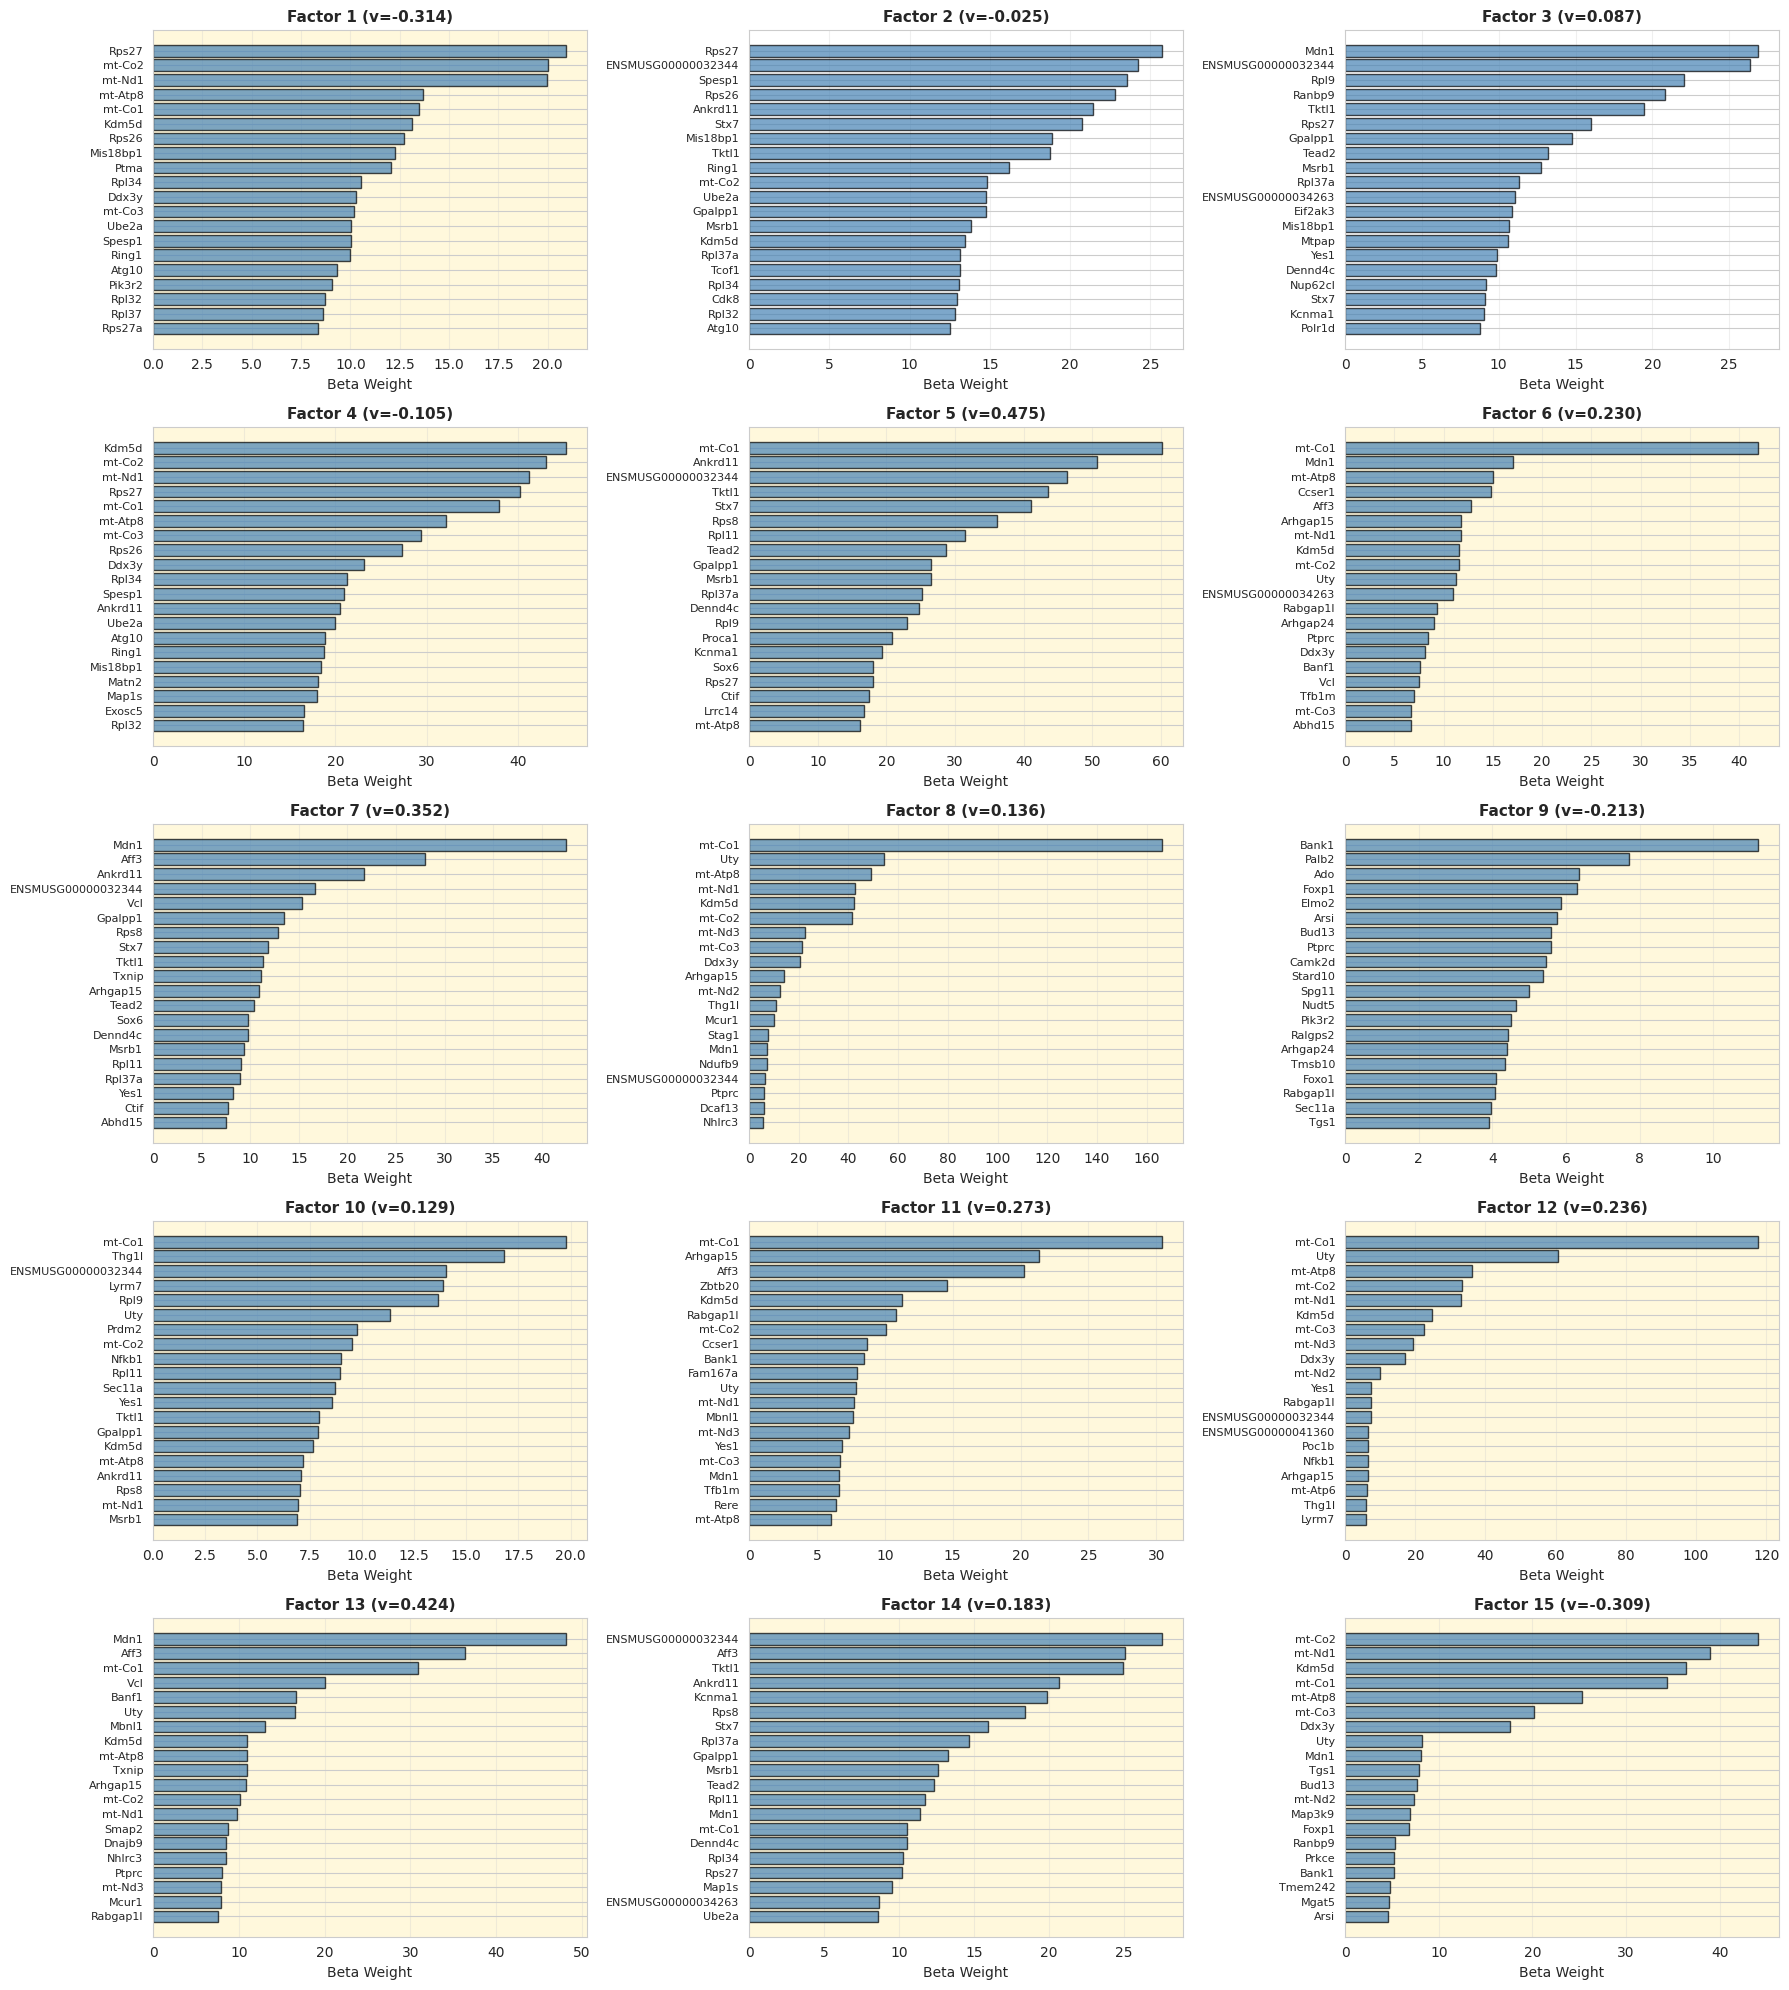


SUMMARY OF ALL 15 FACTORS
Factor     V-weight     Mean Beta    Max Beta     Sparsity %  
--------------------------------------------------------------------------------
Factor 1   -0.3137      0.1884       20.92        21.3        
Factor 2   -0.0253      0.2125       25.72        22.3        
Factor 3   0.0868       0.2289       26.88        34.7        
Factor 4   -0.1050      0.2546       45.27        18.2        
Factor 5   0.4747       0.2107       60.12        22.0        
Factor 6   0.2305       0.1929       41.93        28.6        
Factor 7   0.3519       0.1996       42.49        25.5        
Factor 8   0.1357       0.2327       166.21       27.9        
Factor 9   -0.2132      0.1819       11.21        25.4        
Factor 10  0.1289       0.1922       19.78        35.9        
Factor 11  0.2734       0.1718       30.42        26.9        
Factor 12  0.2365       0.2056       117.67       28.0        
Factor 13  0.4241       0.2004       48.12        14.5        
Factor 14 

In [53]:
import numpy as np

import matplotlib.pyplot as plt

# Get beta values from the model
E_beta = model_superstrong['E_beta']

# Create a large figure with subplots for all 15 factors
fig, axes = plt.subplots(5, 3, figsize=(18, 20))
axes = axes.flatten()

for factor_idx in range(15):
    ax = axes[factor_idx]
    
    # Get beta values for this factor
    beta_factor = E_beta[:, factor_idx]
    
    # Get top 20 genes for this factor
    top_20_idx = np.argsort(beta_factor)[-20:][::-1]
    top_20_ensembl = [train_data.columns[i] for i in top_20_idx]
    top_20_weights = beta_factor[top_20_idx]
    
    # Convert Ensembl IDs to gene symbols
    top_20_symbols = []
    for ensembl_id in top_20_ensembl:
        symbol = [k for k, v in gene_annotation_ensembl_map.items() if v == ensembl_id]
        if symbol:
            top_20_symbols.append(symbol[0])
        else:
            top_20_symbols.append(ensembl_id)
    
    # Get v-weight for this factor
    v_weight = mu_v[0, factor_idx]
    
    # Create horizontal barplot
    y_pos = np.arange(len(top_20_symbols))
    colors = ['steelblue'] * len(top_20_symbols)
    
    ax.barh(y_pos, top_20_weights, color=colors, edgecolor='black', alpha=0.7)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(top_20_symbols, fontsize=8)
    ax.set_xlabel('Beta Weight', fontsize=10)
    ax.set_title(f'Factor {factor_idx + 1} (v={v_weight:.3f})', 
                 fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='x')
    
    # Highlight if this is a disease factor (high v-weight)
    if abs(v_weight) > 0.1:
        ax.set_facecolor('#fff8dc')  # Light yellow background
    
    # Invert y-axis to show highest weight at top
    ax.invert_yaxis()

plt.tight_layout()
plt.savefig('all_15_factors_beta_distributions.png', dpi=150, bbox_inches='tight')
plt.show()

# Print summary table
print("\n" + "="*80)
print("SUMMARY OF ALL 15 FACTORS")
print("="*80)
print(f"{'Factor':<10} {'V-weight':<12} {'Mean Beta':<12} {'Max Beta':<12} {'Sparsity %':<12}")
print("-"*80)

for i in range(15):
    beta_factor = E_beta[:, i]
    v_weight = mu_v[0, i]
    mean_beta = beta_factor.mean()
    max_beta = beta_factor.max()
    sparsity = (beta_factor < 0.01).mean() * 100
    
    print(f"Factor {i+1:<3} {v_weight:<12.4f} {mean_beta:<12.4f} {max_beta:<12.2f} {sparsity:<12.1f}")